<a href="https://colab.research.google.com/github/justacoderq/Analyzing-Formula-1-Race-Data/blob/main/Final_Project_DS2500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 2500 – Final Project : F1 Car Race Performances:

Exploratory Data Analysis on F1 car performance.

Author : Prachi Aswani



In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import probplot

import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

# 1. Data Analysis Question

What factors influence the performance in F1 car races?

# 2. Read in your data

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/results.csv"
results_df = pd.read_csv(url, encoding="latin1")

In [ ]:
results_df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/drivers.csv"
drivers_df = pd.read_csv(url, encoding="latin1")

In [ ]:
drivers_df

driverId        driverRef number code  forename     surname         dob  \
0           1         hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1           2         heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2           3          rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3           4           alonso     14  ALO  Fernando      Alonso  1981-07-29   
4           5       kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   
..        ...              ...    ...  ...       ...         ...         ...   
852       854  mick_schumacher     47  MSC      Mick  Schumacher  1999-03-22   
853       855             zhou     24  ZHO    Guanyu        Zhou  1999-05-30   
854       856         de_vries     21  DEV      Nyck    de Vries  1995-02-06   
855       857          piastri     81  PIA     Oscar     Piastri  2001-04-06   
856       858         sargeant      2  SAR     Logan    Sargeant  2000-12-31   

    nationality                                             url  
0       British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1        German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2        German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3       Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4       Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
..          ...                                             ...  
852      German    http://en.wikipedia.org/wiki/Mick_Schumacher  
853     Chinese        http://en.wikipedia.org/wiki/Zhou_Guanyu  
854       Dutch      http://en.wikipedia.org/wiki/Nyck_de_Vries  
855  Australian      http://en.wikipedia.org/wiki/Oscar_Piastri  
856    American     http://en.wikipedia.org/wiki/Logan_Sargeant  

[857 rows x 9 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/races.csv"
races_df = pd.read_csv(url, encoding="latin1")

In [ ]:
races_df

raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1096    1116  2023     18         69  United States Grand Prix  2023-10-22   
1097    1117  2023     19         32    Mexico City Grand Prix  2023-10-29   
1098    1118  2023     20         18     SÃ£o Paulo Grand Prix  2023-11-05   
1099    1119  2023     21         80      Las Vegas Grand Prix  2023-11-19   
1100    1120  2023     22         24      Abu Dhabi Grand Prix  2023-11-26   

          time                                                url    fp1_date  \
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...          \N   
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...          \N   
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...          \N   
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...          \N   
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...          \N   
...        ...                                                ...         ...   
1096  19:00:00  https://en.wikipedia.org/wiki/2023_United_Stat...  2023-10-20   
1097  20:00:00  https://en.wikipedia.org/wiki/2023_Mexico_City...  2023-10-27   
1098  17:00:00  https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...  2023-11-03   
1099  06:00:00  https://en.wikipedia.org/wiki/2023_Las_Vegas_G...  2023-11-17   
1100  13:00:00  https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...  2023-11-24   

      fp1_time    fp2_date  fp2_time    fp3_date  fp3_time  quali_date  \
0           \N          \N        \N          \N        \N          \N   
1           \N          \N        \N          \N        \N          \N   
2           \N          \N        \N          \N        \N          \N   
3           \N          \N        \N          \N        \N          \N   
4           \N          \N        \N          \N        \N          \N   
...        ...         ...       ...         ...       ...         ...   
1096  17:30:00  2023-10-21  18:00:00          \N        \N  2023-10-20   
1097  18:30:00  2023-10-27  22:00:00  2023-10-28  17:30:00  2023-10-28   
1098  14:30:00  2023-11-04  14:30:00          \N        \N  2023-11-03   
1099  04:30:00  2023-11-17  08:00:00  2023-11-18  04:30:00  2023-11-18   
1100  09:30:00  2023-11-24  13:00:00  2023-11-25  10:30:00  2023-11-25   

     quali_time sprint_date sprint_time  
0            \N          \N          \N  
1            \N          \N          \N  
2            \N          \N          \N  
3            \N          \N          \N  
4            \N          \N          \N  
...         ...         ...         ...  
1096   21:00:00  2023-10-21    22:00:00  
1097   21:00:00          \N          \N  
1098   18:00:00  2023-11-04    18:30:00  
1099   08:00:00          \N          \N  
1100   14:00:00          \N          \N  

[1101 rows x 18 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/constructors.csv"
constructors_df = pd.read_csv(url, encoding="latin1")

In [ ]:
constructors_df

constructorId constructorRef            name nationality  \
0                1        mclaren         McLaren     British   
1                2     bmw_sauber      BMW Sauber      German   
2                3       williams        Williams     British   
3                4        renault         Renault      French   
4                5     toro_rosso      Toro Rosso     Italian   
..             ...            ...             ...         ...   
206            209          manor  Manor Marussia     British   
207            210           haas    Haas F1 Team    American   
208            211   racing_point    Racing Point     British   
209            213     alphatauri      AlphaTauri     Italian   
210            214         alpine  Alpine F1 Team      French   

                                                   url  
0                 http://en.wikipedia.org/wiki/McLaren  
1              http://en.wikipedia.org/wiki/BMW_Sauber  
2    http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3    http://en.wikipedia.org/wiki/Renault_in_Formul...  
4     http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  
..                                                 ...  
206      http://en.wikipedia.org/wiki/Manor_Motorsport  
207          http://en.wikipedia.org/wiki/Haas_F1_Team  
208  http://en.wikipedia.org/wiki/Racing_Point_F1_Team  
209   http://en.wikipedia.org/wiki/Scuderia_AlphaTauri  
210        http://en.wikipedia.org/wiki/Alpine_F1_Team  

[211 rows x 5 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/constructor_standings.csv"
constructorStanding_df = pd.read_csv(url, encoding="latin1")

In [ ]:
constructorStanding_df

constructorStandingsId  raceId  constructorId  points  position  \
0                           1      18              1    14.0         1   
1                           2      18              2     8.0         3   
2                           3      18              3     9.0         2   
3                           4      18              4     5.0         4   
4                           5      18              5     2.0         5   
...                       ...     ...            ...     ...       ...   
13046                   28568    1110            214    57.0         6   
13047                   28569    1110              3    11.0         7   
13048                   28570    1110            213     3.0        10   
13049                   28571    1110            210    11.0         8   
13050                   28572    1110              1   103.0         5   

      positionText  wins  
0                1     1  
1                3     0  
2                2     0  
3                4     0  
4                5     0  
...            ...   ...  
13046            6     0  
13047            7     0  
13048           10     0  
13049            8     0  
13050            5     0  

[13051 rows x 7 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/qualifying.csv"
qualifying_df = pd.read_csv(url, encoding="latin1")

In [ ]:
qualifying_df

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0             1      18         1              1      22         1  1:26.572   
1             2      18         9              2       4         2  1:26.103   
2             3      18         5              1      23         3  1:25.664   
3             4      18        13              6       2         4  1:25.994   
4             5      18         2              2       3         5  1:25.960   
...         ...     ...       ...            ...     ...       ...       ...   
9810       9868    1110       848              3      23        16  2:00.314   
9811       9869    1110       855             51      24        17  2:00.832   
9812       9870    1110       858              3       2        18  2:01.535   
9813       9871    1110       817            213       3        19  2:02.159   
9814       9872    1110       807            210      27        20  2:03.166   

            q2        q3  
0     1:25.187  1:26.714  
1     1:25.315  1:26.869  
2     1:25.452  1:27.079  
3     1:25.691  1:27.178  
4     1:25.518  1:27.236  
...        ...       ...  
9810        \N        \N  
9811        \N        \N  
9812        \N        \N  
9813        \N        \N  
9814        \N        \N  

[9815 rows x 9 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/pit_stops.csv"
pitstops_df = pd.read_csv(url, encoding="latin1")

In [ ]:
pitstops_df

raceId  driverId  stop  lap      time duration  milliseconds
0         841       153     1    1  17:05:23   26.898         26898
1         841        30     1    1  17:05:52   25.021         25021
2         841        17     1   11  17:20:48   23.426         23426
3         841         4     1   12  17:22:34   23.251         23251
4         841        13     1   13  17:24:10   23.842         23842
...       ...       ...   ...  ...       ...      ...           ...
10084    1110         4     2   29  15:59:01   23.798         23798
10085    1110       830     2   30  16:00:16   23.012         23012
10086    1110       848     3   33  16:07:06   23.529         23529
10087    1110       858     3   34  16:09:09   23.109         23109
10088    1110         1     3   42  16:23:05   23.156         23156

[10089 rows x 7 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/lap_times.csv"
laptimes_df = pd.read_csv(url, encoding="latin1")

In [ ]:
laptimes_df

raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
551737    1110       817   40        17  1:54.361        114361
551738    1110       817   41        17  1:53.367        113367
551739    1110       817   42        16  1:55.247        115247
551740    1110       817   43        16  1:52.115        112115
551741    1110       817   44        16  1:52.265        112265

[551742 rows x 6 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/driver_standings.csv"
driverstandings_df = pd.read_csv(url, encoding="latin1")

In [ ]:
driverstandings_df

driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
34119              72183    1110       846    69.0         8            8   
34120              72184    1110       839    35.0        10           10   
34121              72185    1110       844    99.0         5            5   
34122              72186    1110       857    34.0        11           11   
34123              72187    1110       817     0.0        21           21   

       wins  
0         1  
1         0  
2         0  
3         0  
4         0  
...     ...  
34119     0  
34120     0  
34121     0  
34122     0  
34123     0  

[34124 rows x 7 columns]

In [ ]:
# GitHub raw URL for the CSV file
url = "https://raw.githubusercontent.com/justacoderq/datasets/main/circuits.csv"
circuits_df = pd.read_csv(url, encoding="latin1")

In [ ]:
circuits_df

circuitId   circuitRef                                  name  \
0           1  albert_park        Albert Park Grand Prix Circuit   
1           2       sepang          Sepang International Circuit   
2           3      bahrain         Bahrain International Circuit   
3           4    catalunya        Circuit de Barcelona-Catalunya   
4           5     istanbul                         Istanbul Park   
..        ...          ...                                   ...   
72         75     portimao   AutÃ³dromo Internacional do Algarve   
73         76      mugello  Autodromo Internazionale del Mugello   
74         77       jeddah               Jeddah Corniche Circuit   
75         78       losail          Losail International Circuit   
76         79        miami         Miami International Autodrome   

        location       country       lat        lng  alt  \
0      Melbourne     Australia -37.84970  144.96800   10   
1   Kuala Lumpur      Malaysia   2.76083  101.73800   18   
2         Sakhir       Bahrain  26.03250   50.51060    7   
3      MontmelÃ³         Spain  41.57000    2.26111  109   
4       Istanbul        Turkey  40.95170   29.40500  130   
..           ...           ...       ...        ...  ...   
72     PortimÃ£o      Portugal  37.22700   -8.62670  108   
73       Mugello         Italy  43.99750   11.37190  255   
74        Jeddah  Saudi Arabia  21.63190   39.10440   15   
75     Al Daayen         Qatar  25.49000   51.45420   \N   
76         Miami           USA  25.95810  -80.23890   \N   

                                                  url  
0   http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1   http://en.wikipedia.org/wiki/Sepang_Internatio...  
2   http://en.wikipedia.org/wiki/Bahrain_Internati...  
3   http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4          http://en.wikipedia.org/wiki/Istanbul_Park  
..                                                ...  
72  http://en.wikipedia.org/wiki/Algarve_Internati...  
73       http://en.wikipedia.org/wiki/Mugello_Circuit  
74  http://en.wikipedia.org/wiki/Jeddah_Street_Cir...  
75  http://en.wikipedia.org/wiki/Losail_Internatio...  
76  http://en.wikipedia.org/wiki/Miami_Internation...  

[77 rows x 9 columns]

# 3. Data Cleaning and Combining

In [ ]:
# Merge results_df with races_df on raceId
final_df = pd.merge(results_df, races_df, on='raceId', how='inner')

In [ ]:
final_df

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26075     26081    1110       817            213      3    19       16   
26076     26082    1110       858              3      2    18       17   
26077     26083    1110       807            210     27     0       18   
26078     26084    1110       832              6     55     4       \N   
26079     26085    1110       857              1     81     5       \N   

      positionText  positionOrder  points  ...    fp1_date  fp1_time  \
0                1              1    10.0  ...          \N        \N   
1                2              2     8.0  ...          \N        \N   
2                3              3     6.0  ...          \N        \N   
3                4              4     5.0  ...          \N        \N   
4                5              5     4.0  ...          \N        \N   
...            ...            ...     ...  ...         ...       ...   
26075           16             16     0.0  ...  2023-07-28  11:30:00   
26076           17             17     0.0  ...  2023-07-28  11:30:00   
26077           18             18     0.0  ...  2023-07-28  11:30:00   
26078            R             19     0.0  ...  2023-07-28  11:30:00   
26079            R             20     0.0  ...  2023-07-28  11:30:00   

         fp2_date  fp2_time fp3_date fp3_time  quali_date  quali_time  \
0              \N        \N       \N       \N          \N          \N   
1              \N        \N       \N       \N          \N          \N   
2              \N        \N       \N       \N          \N          \N   
3              \N        \N       \N       \N          \N          \N   
4              \N        \N       \N       \N          \N          \N   
...           ...       ...      ...      ...         ...         ...   
26075  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26076  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26077  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26078  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26079  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   

       sprint_date  sprint_time  
0               \N           \N  
1               \N           \N  
2               \N           \N  
3               \N           \N  
4               \N           \N  
...            ...          ...  
26075   2023-07-29     14:30:00  
26076   2023-07-29     14:30:00  
26077   2023-07-29     14:30:00  
26078   2023-07-29     14:30:00  
26079   2023-07-29     14:30:00  

[26080 rows x 35 columns]

In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time'],
      dtype='object')

In [ ]:
final_df.rename(columns={'time_x': 'race_time'}, inplace=True)

In [ ]:
final_df

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26075     26081    1110       817            213      3    19       16   
26076     26082    1110       858              3      2    18       17   
26077     26083    1110       807            210     27     0       18   
26078     26084    1110       832              6     55     4       \N   
26079     26085    1110       857              1     81     5       \N   

      positionText  positionOrder  points  ...    fp1_date  fp1_time  \
0                1              1    10.0  ...          \N        \N   
1                2              2     8.0  ...          \N        \N   
2                3              3     6.0  ...          \N        \N   
3                4              4     5.0  ...          \N        \N   
4                5              5     4.0  ...          \N        \N   
...            ...            ...     ...  ...         ...       ...   
26075           16             16     0.0  ...  2023-07-28  11:30:00   
26076           17             17     0.0  ...  2023-07-28  11:30:00   
26077           18             18     0.0  ...  2023-07-28  11:30:00   
26078            R             19     0.0  ...  2023-07-28  11:30:00   
26079            R             20     0.0  ...  2023-07-28  11:30:00   

         fp2_date  fp2_time fp3_date fp3_time  quali_date  quali_time  \
0              \N        \N       \N       \N          \N          \N   
1              \N        \N       \N       \N          \N          \N   
2              \N        \N       \N       \N          \N          \N   
3              \N        \N       \N       \N          \N          \N   
4              \N        \N       \N       \N          \N          \N   
...           ...       ...      ...      ...         ...         ...   
26075  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26076  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26077  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26078  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26079  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   

       sprint_date  sprint_time  
0               \N           \N  
1               \N           \N  
2               \N           \N  
3               \N           \N  
4               \N           \N  
...            ...          ...  
26075   2023-07-29     14:30:00  
26076   2023-07-29     14:30:00  
26077   2023-07-29     14:30:00  
26078   2023-07-29     14:30:00  
26079   2023-07-29     14:30:00  

[26080 rows x 35 columns]

In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps',
       'race_time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time'],
      dtype='object')

In [ ]:
# Columns to drop
columns_to_drop = ['time_y','url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
                   'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']

# Dropping unnecessary columns from the final_df
final_df = final_df.drop(columns=columns_to_drop)
final_df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  ...  fastestLap rank fastestLapTime  \
0            1              1    10.0  ...          39    2       1:27.452   
1            2              2     8.0  ...          41    3       1:27.739   
2            3              3     6.0  ...          41    5       1:28.090   
3            4              4     5.0  ...          58    7       1:28.603   
4            5              5     4.0  ...          43    1       1:27.418   

  fastestLapSpeed statusId  year round  circuitId                   name  \
0         218.300        1  2008     1          1  Australian Grand Prix   
1         217.586        1  2008     1          1  Australian Grand Prix   
2         216.719        1  2008     1          1  Australian Grand Prix   
3         215.464        1  2008     1          1  Australian Grand Prix   
4         218.385        1  2008     1          1  Australian Grand Prix   

         date  
0  2008-03-16  
1  2008-03-16  
2  2008-03-16  
3  2008-03-16  
4  2008-03-16  

[5 rows x 23 columns]

In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps',
       'race_time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date'],
      dtype='object')

In [ ]:
# Check null values in final_df
final_null_counts = final_df.isnull().sum()
print("\nNull values in final_df:")
print(final_null_counts)


Null values in final_df:
resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
race_time          0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
year               0
round              0
circuitId          0
name               0
date               0
dtype: int64


In [ ]:
# Merge final_df with pitstops_df on raceId and driverId
final_df = pd.merge(final_df, pitstops_df, on=['raceId', 'driverId'], how='inner')

In [ ]:
final_df

resultId  raceId  driverId  constructorId number  grid position  \
0         20779     841        20              9      1     1        1   
1         20779     841        20              9      1     1        1   
2         20780     841         1              1      3     2        2   
3         20780     841         1              1      3     2        2   
4         20781     841       808              4     10     6        3   
...         ...     ...       ...            ...    ...   ...      ...   
10084     26082    1110       858              3      2    18       17   
10085     26082    1110       858              3      2    18       17   
10086     26083    1110       807            210     27     0       18   
10087     26083    1110       807            210     27     0       18   
10088     26084    1110       832              6     55     4       \N   

      positionText  positionOrder  points  ...  year round circuitId  \
0                1              1    25.0  ...  2011     1         1   
1                1              1    25.0  ...  2011     1         1   
2                2              2    18.0  ...  2011     1         1   
3                2              2    18.0  ...  2011     1         1   
4                3              3    15.0  ...  2011     1         1   
...            ...            ...     ...  ...   ...   ...       ...   
10084           17             17     0.0  ...  2023    12        13   
10085           17             17     0.0  ...  2023    12        13   
10086           18             18     0.0  ...  2023    12        13   
10087           18             18     0.0  ...  2023    12        13   
10088            R             19     0.0  ...  2023    12        13   

                        name        date stop lap      time  duration  \
0      Australian Grand Prix  2011-03-27    1  14  17:25:17    22.603   
1      Australian Grand Prix  2011-03-27    2  36  17:59:17    24.036   
2      Australian Grand Prix  2011-03-27    1  16  17:28:24    23.227   
3      Australian Grand Prix  2011-03-27    2  36  17:59:29    23.199   
4      Australian Grand Prix  2011-03-27    1  16  17:28:39    24.535   
...                      ...         ...  ...  ..       ...       ...   
10084     Belgian Grand Prix  2023-07-30    2  24  15:50:09    23.938   
10085     Belgian Grand Prix  2023-07-30    3  34  16:09:09    23.109   
10086     Belgian Grand Prix  2023-07-30    1  12  15:26:56    24.571   
10087     Belgian Grand Prix  2023-07-30    2  24  15:50:04    25.238   
10088     Belgian Grand Prix  2023-07-30    1   7  15:17:20    23.303   

       milliseconds_y  
0               22603  
1               24036  
2               23227  
3               23199  
4               24535  
...               ...  
10084           23938  
10085           23109  
10086           24571  
10087           25238  
10088           23303  

[10089 rows x 28 columns]

In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps',
       'race_time', 'milliseconds_x', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'stop', 'lap', 'time', 'duration', 'milliseconds_y'],
      dtype='object')

In [ ]:
final_df.rename(columns={'milliseconds_x': 'race_time_milliseconds'}, inplace=True)
final_df.rename(columns={'milliseconds_y': 'pitstop_time_milliseconds'}, inplace=True)
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps',
       'race_time', 'race_time_milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year', 'round',
       'circuitId', 'name', 'date', 'stop', 'lap', 'time', 'duration',
       'pitstop_time_milliseconds'],
      dtype='object')

In [ ]:
final_df

resultId  raceId  driverId  constructorId number  grid position  \
0         20779     841        20              9      1     1        1   
1         20779     841        20              9      1     1        1   
2         20780     841         1              1      3     2        2   
3         20780     841         1              1      3     2        2   
4         20781     841       808              4     10     6        3   
...         ...     ...       ...            ...    ...   ...      ...   
10084     26082    1110       858              3      2    18       17   
10085     26082    1110       858              3      2    18       17   
10086     26083    1110       807            210     27     0       18   
10087     26083    1110       807            210     27     0       18   
10088     26084    1110       832              6     55     4       \N   

      positionText  positionOrder  points  ...  year round circuitId  \
0                1              1    25.0  ...  2011     1         1   
1                1              1    25.0  ...  2011     1         1   
2                2              2    18.0  ...  2011     1         1   
3                2              2    18.0  ...  2011     1         1   
4                3              3    15.0  ...  2011     1         1   
...            ...            ...     ...  ...   ...   ...       ...   
10084           17             17     0.0  ...  2023    12        13   
10085           17             17     0.0  ...  2023    12        13   
10086           18             18     0.0  ...  2023    12        13   
10087           18             18     0.0  ...  2023    12        13   
10088            R             19     0.0  ...  2023    12        13   

                        name        date stop lap      time  duration  \
0      Australian Grand Prix  2011-03-27    1  14  17:25:17    22.603   
1      Australian Grand Prix  2011-03-27    2  36  17:59:17    24.036   
2      Australian Grand Prix  2011-03-27    1  16  17:28:24    23.227   
3      Australian Grand Prix  2011-03-27    2  36  17:59:29    23.199   
4      Australian Grand Prix  2011-03-27    1  16  17:28:39    24.535   
...                      ...         ...  ...  ..       ...       ...   
10084     Belgian Grand Prix  2023-07-30    2  24  15:50:09    23.938   
10085     Belgian Grand Prix  2023-07-30    3  34  16:09:09    23.109   
10086     Belgian Grand Prix  2023-07-30    1  12  15:26:56    24.571   
10087     Belgian Grand Prix  2023-07-30    2  24  15:50:04    25.238   
10088     Belgian Grand Prix  2023-07-30    1   7  15:17:20    23.303   

       pitstop_time_milliseconds  
0                          22603  
1                          24036  
2                          23227  
3                          23199  
4                          24535  
...                          ...  
10084                      23938  
10085                      23109  
10086                      24571  
10087                      25238  
10088                      23303  

[10089 rows x 28 columns]

In [ ]:
final_df.dtypes

resultId                       int64
raceId                         int64
driverId                       int64
constructorId                  int64
number                        object
grid                           int64
position                      object
positionText                  object
positionOrder                  int64
points                       float64
laps                           int64
race_time                     object
race_time_milliseconds        object
fastestLap                    object
rank                          object
fastestLapTime                object
fastestLapSpeed               object
statusId                       int64
year                           int64
round                          int64
circuitId                      int64
name                          object
date                          object
stop                           int64
lap                            int64
time                          object
duration                      object
p

# Data Cleaning

In [ ]:
# Replace non-numeric values with NaN
final_df['position'] = pd.to_numeric(final_df['position'], errors='coerce')

# Convert the column to float
final_df['position'] = final_df['position'].astype(float)

In [ ]:
# Replace non-numeric values with NaN
final_df['grid'] = pd.to_numeric(final_df['grid'], errors='coerce')

# Convert the column to float
final_df['grid'] = final_df['grid'].astype(float)

In [ ]:
final_df['position']

0         1.0
1         1.0
2         2.0
3         2.0
4         3.0
         ... 
10084    17.0
10085    17.0
10086    18.0
10087    18.0
10088     NaN
Name: position, Length: 10089, dtype: float64

In [ ]:
# Check null values in final_df
final_null_counts = final_df.isnull().sum()
print("\nNull values in final_df:")
print(final_null_counts)


Null values in final_df:
resultId                       0
raceId                         0
driverId                       0
constructorId                  0
number                         0
grid                           0
position                     865
positionText                   0
positionOrder                  0
points                         0
laps                           0
race_time                      0
race_time_milliseconds         0
fastestLap                     0
rank                           0
fastestLapTime                 0
fastestLapSpeed                0
statusId                       0
year                           0
round                          0
circuitId                      0
name                           0
date                           0
stop                           0
lap                            0
time                           0
duration                       0
pitstop_time_milliseconds      0
dtype: int64


In [ ]:
# Drop rows with NaN values in the 'position' column
final_df.dropna(subset=['position'], inplace=True)

In [ ]:
# Drop rows with NaN values in the 'grid' column
final_df.dropna(subset=['grid'], inplace=True)

In [ ]:
final_df

resultId  raceId  driverId  constructorId number  grid  position  \
0         20779     841        20              9      1   1.0       1.0   
1         20779     841        20              9      1   1.0       1.0   
2         20780     841         1              1      3   2.0       2.0   
3         20780     841         1              1      3   2.0       2.0   
4         20781     841       808              4     10   6.0       3.0   
...         ...     ...       ...            ...    ...   ...       ...   
10083     26082    1110       858              3      2  18.0      17.0   
10084     26082    1110       858              3      2  18.0      17.0   
10085     26082    1110       858              3      2  18.0      17.0   
10086     26083    1110       807            210     27   0.0      18.0   
10087     26083    1110       807            210     27   0.0      18.0   

      positionText  positionOrder  points  ...  year round circuitId  \
0                1              1    25.0  ...  2011     1         1   
1                1              1    25.0  ...  2011     1         1   
2                2              2    18.0  ...  2011     1         1   
3                2              2    18.0  ...  2011     1         1   
4                3              3    15.0  ...  2011     1         1   
...            ...            ...     ...  ...   ...   ...       ...   
10083           17             17     0.0  ...  2023    12        13   
10084           17             17     0.0  ...  2023    12        13   
10085           17             17     0.0  ...  2023    12        13   
10086           18             18     0.0  ...  2023    12        13   
10087           18             18     0.0  ...  2023    12        13   

                        name        date stop lap      time  duration  \
0      Australian Grand Prix  2011-03-27    1  14  17:25:17    22.603   
1      Australian Grand Prix  2011-03-27    2  36  17:59:17    24.036   
2      Australian Grand Prix  2011-03-27    1  16  17:28:24    23.227   
3      Australian Grand Prix  2011-03-27    2  36  17:59:29    23.199   
4      Australian Grand Prix  2011-03-27    1  16  17:28:39    24.535   
...                      ...         ...  ...  ..       ...       ...   
10083     Belgian Grand Prix  2023-07-30    1   8  15:19:14    23.570   
10084     Belgian Grand Prix  2023-07-30    2  24  15:50:09    23.938   
10085     Belgian Grand Prix  2023-07-30    3  34  16:09:09    23.109   
10086     Belgian Grand Prix  2023-07-30    1  12  15:26:56    24.571   
10087     Belgian Grand Prix  2023-07-30    2  24  15:50:04    25.238   

       pitstop_time_milliseconds  
0                          22603  
1                          24036  
2                          23227  
3                          23199  
4                          24535  
...                          ...  
10083                      23570  
10084                      23938  
10085                      23109  
10086                      24571  
10087                      25238  

[9224 rows x 28 columns]

In [ ]:
# Check null values in final_df
final_null_counts = final_df.isnull().sum()
print("\nNull values in final_df:")
print(final_null_counts)


Null values in final_df:
resultId                     0
raceId                       0
driverId                     0
constructorId                0
number                       0
grid                         0
position                     0
positionText                 0
positionOrder                0
points                       0
laps                         0
race_time                    0
race_time_milliseconds       0
fastestLap                   0
rank                         0
fastestLapTime               0
fastestLapSpeed              0
statusId                     0
year                         0
round                        0
circuitId                    0
name                         0
date                         0
stop                         0
lap                          0
time                         0
duration                     0
pitstop_time_milliseconds    0
dtype: int64


In [ ]:
final_df.rename(columns={'position': 'final_position'}, inplace=True)
final_df.rename(columns={'grid': 'grid_position'}, inplace=True)
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid_position', 'final_position', 'positionText', 'positionOrder',
       'points', 'laps', 'race_time', 'race_time_milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'circuitId', 'name', 'date', 'stop', 'lap', 'time', 'duration',
       'pitstop_time_milliseconds'],
      dtype='object')

In [ ]:
final_df = pd.merge(final_df,constructors_df,on='constructorId', how ='inner')

In [ ]:
final_df

resultId  raceId  driverId  constructorId number  grid_position  \
0        20779     841        20              9      1            1.0   
1        20779     841        20              9      1            1.0   
2        20783     841        17              9      2            3.0   
3        20783     841        17              9      2            3.0   
4        20783     841        17              9      2            3.0   
...        ...     ...       ...            ...    ...            ...   
9219     26019    1107       839            214     31           12.0   
9220     26043    1108       842            214     10           10.0   
9221     26073    1110       839            214     31           14.0   
9222     26073    1110       839            214     31           14.0   
9223     26076    1110       842            214     10           12.0   

      final_position positionText  positionOrder  points  ...        date  \
0                1.0            1              1    25.0  ...  2011-03-27   
1                1.0            1              1    25.0  ...  2011-03-27   
2                5.0            5              5    10.0  ...  2011-03-27   
3                5.0            5              5    10.0  ...  2011-03-27   
4                5.0            5              5    10.0  ...  2011-03-27   
...              ...          ...            ...     ...  ...         ...   
9219            14.0           14             14     0.0  ...  2023-07-02   
9220            18.0           18             18     0.0  ...  2023-07-09   
9221             8.0            8              8     4.0  ...  2023-07-30   
9222             8.0            8              8     4.0  ...  2023-07-30   
9223            11.0           11             11     0.0  ...  2023-07-30   

     stop lap      time duration pitstop_time_milliseconds constructorRef  \
0       1  14  17:25:17   22.603                     22603       red_bull   
1       2  36  17:59:17   24.036                     24036       red_bull   
2       1  11  17:20:48   23.426                     23426       red_bull   
3       2  26  17:44:29   22.520                     22520       red_bull   
4       3  41  18:07:37   26.230                     26230       red_bull   
...   ...  ..       ...      ...                       ...            ...   
9219    3  40  15:52:55   30.427                     30427         alpine   
9220    1  31  15:51:30   28.458                     28458         alpine   
9221    1   6  15:15:23   23.085                     23085         alpine   
9222    2  25  15:51:50   23.339                     23339         alpine   
9223    1  23  15:48:00   25.664                     25664         alpine   

              name_y  nationality  \
0           Red Bull     Austrian   
1           Red Bull     Austrian   
2           Red Bull     Austrian   
3           Red Bull     Austrian   
4           Red Bull     Austrian   
...              ...          ...   
9219  Alpine F1 Team       French   
9220  Alpine F1 Team       French   
9221  Alpine F1 Team       French   
9222  Alpine F1 Team       French   
9223  Alpine F1 Team       French   

                                               url  
0     http://en.wikipedia.org/wiki/Red_Bull_Racing  
1     http://en.wikipedia.org/wiki/Red_Bull_Racing  
2     http://en.wikipedia.org/wiki/Red_Bull_Racing  
3     http://en.wikipedia.org/wiki/Red_Bull_Racing  
4     http://en.wikipedia.org/wiki/Red_Bull_Racing  
...                                            ...  
9219   http://en.wikipedia.org/wiki/Alpine_F1_Team  
9220   http://en.wikipedia.org/wiki/Alpine_F1_Team  
9221   http://en.wikipedia.org/wiki/Alpine_F1_Team  
9222   http://en.wikipedia.org/wiki/Alpine_F1_Team  
9223   http://en.wikipedia.org/wiki/Alpine_F1_Team  

[9224 rows x 32 columns]

In [ ]:
# Check null values in final_df
final_df_null_counts = final_df.isnull().sum()
print("\nNull values in final_df:")
print(final_null_counts)


Null values in final_df:
resultId                     0
raceId                       0
driverId                     0
constructorId                0
number                       0
grid                         0
position                     0
positionText                 0
positionOrder                0
points                       0
laps                         0
race_time                    0
race_time_milliseconds       0
fastestLap                   0
rank                         0
fastestLapTime               0
fastestLapSpeed              0
statusId                     0
year                         0
round                        0
circuitId                    0
name                         0
date                         0
stop                         0
lap                          0
time                         0
duration                     0
pitstop_time_milliseconds    0
dtype: int64


In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid_position', 'final_position', 'positionText', 'positionOrder',
       'points', 'laps', 'race_time', 'race_time_milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'circuitId', 'name_x', 'date', 'stop', 'lap', 'time',
       'duration', 'pitstop_time_milliseconds', 'constructorRef', 'name_y',
       'nationality', 'url'],
      dtype='object')

In [ ]:
final_df.rename(columns={'name_x': 'circuit_name'}, inplace=True)
final_df.rename(columns={'name_y': 'constructor_name'}, inplace=True)
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid_position', 'final_position', 'positionText', 'positionOrder',
       'points', 'laps', 'race_time', 'race_time_milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'circuitId', 'circuit_name', 'date', 'stop', 'lap', 'time',
       'duration', 'pitstop_time_milliseconds', 'constructorRef',
       'constructor_name', 'nationality', 'url'],
      dtype='object')

In [ ]:
columns_to_drop = ['rank','fastestLapSpeed','statusId','round','stop','lap','duration','pitstop_time_milliseconds','constructor_name','nationality','url']
final_df.drop(columns = columns_to_drop)

resultId  raceId  driverId  constructorId number  grid_position  \
0        20779     841        20              9      1            1.0   
1        20779     841        20              9      1            1.0   
2        20783     841        17              9      2            3.0   
3        20783     841        17              9      2            3.0   
4        20783     841        17              9      2            3.0   
...        ...     ...       ...            ...    ...            ...   
9219     26019    1107       839            214     31           12.0   
9220     26043    1108       842            214     10           10.0   
9221     26073    1110       839            214     31           14.0   
9222     26073    1110       839            214     31           14.0   
9223     26076    1110       842            214     10           12.0   

      final_position positionText  positionOrder  points  ...    race_time  \
0                1.0            1              1    25.0  ...  1:29:30.259   
1                1.0            1              1    25.0  ...  1:29:30.259   
2                5.0            5              5    10.0  ...      +38.171   
3                5.0            5              5    10.0  ...      +38.171   
4                5.0            5              5    10.0  ...      +38.171   
...              ...          ...            ...     ...  ...          ...   
9219            14.0           14             14     0.0  ...           \N   
9220            18.0           18             18     0.0  ...           \N   
9221             8.0            8              8     4.0  ...    +1:14.719   
9222             8.0            8              8     4.0  ...    +1:14.719   
9223            11.0           11             11     0.0  ...    +1:23.084   

     race_time_milliseconds fastestLap fastestLapTime  year  circuitId  \
0                   5370259         44       1:29.844  2011          1   
1                   5370259         44       1:29.844  2011          1   
2                   5408430         50       1:29.600  2011          1   
3                   5408430         50       1:29.600  2011          1   
4                   5408430         50       1:29.600  2011          1   
...                     ...        ...            ...   ...        ...   
9219                     \N         46       1:09.786  2023         70   
9220                     \N         42       1:31.539  2023          9   
9221                5025169         27       1:50.439  2023         13   
9222                5025169         27       1:50.439  2023         13   
9223                5033534         25       1:50.911  2023         13   

               circuit_name        date      time constructorRef  
0     Australian Grand Prix  2011-03-27  17:25:17       red_bull  
1     Australian Grand Prix  2011-03-27  17:59:17       red_bull  
2     Australian Grand Prix  2011-03-27  17:20:48       red_bull  
3     Australian Grand Prix  2011-03-27  17:44:29       red_bull  
4     Australian Grand Prix  2011-03-27  18:07:37       red_bull  
...                     ...         ...       ...            ...  
9219    Austrian Grand Prix  2023-07-02  15:52:55         alpine  
9220     British Grand Prix  2023-07-09  15:51:30         alpine  
9221     Belgian Grand Prix  2023-07-30  15:15:23         alpine  
9222     Belgian Grand Prix  2023-07-30  15:51:50         alpine  
9223     Belgian Grand Prix  2023-07-30  15:48:00         alpine  

[9224 rows x 21 columns]

# 4. Check the N's

# The different circuits around the world

In [ ]:
import folium

# Create a map centered around the mean latitude and longitude of circuits
map_circuits = folium.Map(location=[circuits_df['lat'].mean(), circuits_df['lng'].mean()], zoom_start=3)

# Add markers for each circuit
for index, row in circuits_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['name'],
        tooltip=row['name']
    ).add_to(map_circuits)

# Display the map
map_circuits


# Unique Id counts

In [ ]:
print("Unique count of result IDs:", final_df['resultId'].nunique())
print("Unique count of race IDs:", final_df['raceId'].nunique())
print("Unique count of driver IDs:", final_df['driverId'].nunique())
print("Unique count of constructor IDs:", final_df['constructorId'].nunique())
print("Unique count of circuits:", final_df['circuitId'].nunique())

Unique count of result IDs: 4428
Unique count of race IDs: 251
Unique count of driver IDs: 72
Unique count of constructor IDs: 22
Unique count of circuits: 34


# Time Span

In [ ]:
final_df['year'] = pd.to_datetime(final_df['date']).dt.year
print("Data covers years from", final_df['year'].min(), "to", final_df['year'].max())

Data covers years from 2011 to 2023


# Number of entries per year

In [ ]:
final_df.groupby('year')['raceId'].count()

year
2011    1007
2012     871
2013     890
2014     731
2015     653
2016     891
2017     607
2018     485
2019     591
2020     560
2021     747
2022     754
2023     437
Name: raceId, dtype: int64

# Range of Points

In [ ]:
print("Points range:", final_df['points'].min(), "-", final_df['points'].max())
print("Position range:", final_df['final_position'].min(), "-", final_df['final_position'].max())

Points range: 0.0 - 50.0
Position range: 1.0 - 24.0


# 5. Validate against an external data source

# Date and Time positive

In [ ]:
final_df['time'].min()

'13:04:31'

In [ ]:
final_df['date'].min()

'2011-03-27'

# All of the Id's are positive

In [ ]:
print("Unique count of result IDs:", final_df['resultId'].min())
print("Unique count of race IDs:", final_df['raceId'].min())
print("Unique count of driver IDs:", final_df['driverId'].min())
print("Unique count of constructor IDs:", final_df['constructorId'].min())
print("Unique count of circuits:", final_df['circuitId'].min())

Unique count of result IDs: 20779
Unique count of race IDs: 841
Unique count of driver IDs: 1
Unique count of constructor IDs: 1
Unique count of circuits: 1


# Stop must be greater than or equal to 1

In [ ]:
final_df['stop'].min()

1

# 6. Correlation Heatmap

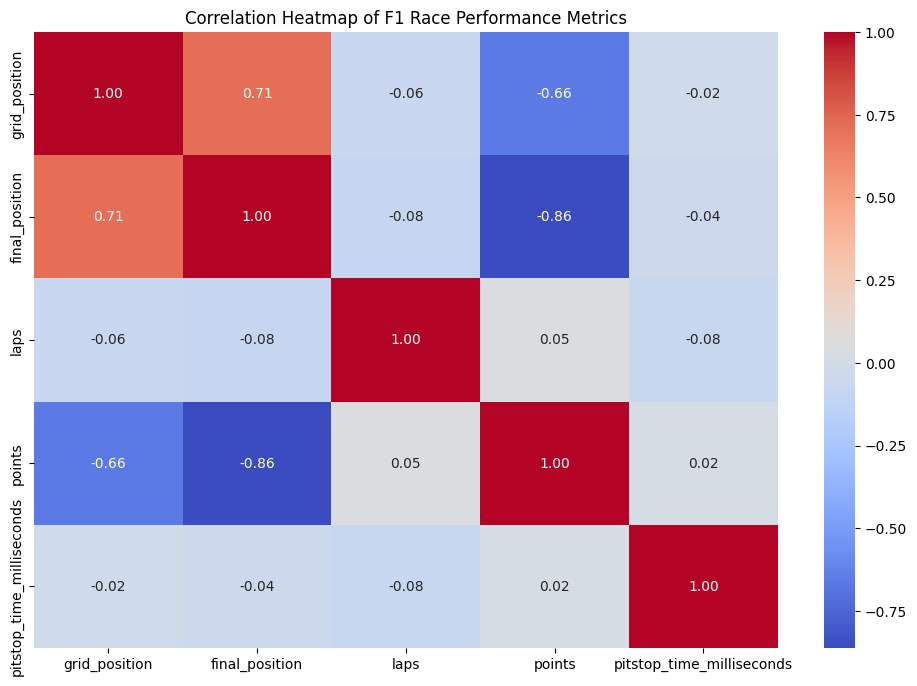

In [ ]:
# Selecting relevant columns for correlation
correlation_vars = ['grid_position', 'final_position', 'laps', 'points', 'pitstop_time_milliseconds']
corr_matrix = final_df[correlation_vars].corr()
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of F1 Race Performance Metrics')
plt.show()

# 7. Series of Analysis

# Analysis 1 : **Exploring the Dynamics of Grid Position, Constructor Influence, on Race Outcomes in Formula 1 Racing**

Let's first see the obvious correlation.

Grid position V/S Final position

In [ ]:
import plotly.express as px

# Create an interactive scatter plot for position and grid
fig = px.scatter(final_df, x='grid_position', y='final_position', title='Grid Position vs Final Position',trendline = "ols")

# Show the interactive plot
fig.show()

In [ ]:
primary_model = smf.ols(formula = 'final_position ~ grid_position',data = final_df).fit()

# Summarize the model
primary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         final_position   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     9583.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:27:41   Log-Likelihood:                -25363.
No. Observations:                9224   AIC:                         5.073e+04
Df Residuals:                    9222   BIC:                         5.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.1652      0.078     40.551      0.000       3.012       3.318
grid_position     0.6107      0.006     97.894      0.000       0.599       0.623
==============================================================================
Omnibus:                      518.435   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.675
Skew:                           0.442   Prob(JB):                    9.70e-197
Kurtosis:                       4.252   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared value of 0.510 - This value indicates that approximately 51% of the variability in final racing positions can be explained by the starting grid positions. This is a substantial proportion, emphasizing the strong impact of grid positions on race outcomes.

For each unit increase in grid position, the final position is expected to increase by about 0.6107 places. This coefficient is significant (P>|t| close to 0.00), suggesting a strong positive relationship between starting further back and finishing in a worse position.

In [ ]:
import plotly.graph_objects as go

# Calculate predicted values
final_df['predicted_position'] = primary_model.predict(final_df['grid_position'])

# Create scatter plot
scatter_plot = px.scatter(final_df, x='grid_position', y='final_position', title='Actual vs Predicted Position',
                          trendline='ols', trendline_color_override='red')

# Add reference line with slope of 1
scatter_plot.add_trace(go.Scatter(x=[final_df['grid_position'].min(), final_df['grid_position'].max()],
                                  y=[final_df['grid_position'].min(), final_df['grid_position'].max()],
                                  mode='lines',
                                  name='Ideal Relationship'))

# Show the interactive plot
scatter_plot.show()


# Adding Constructor_Ref which might have an effect on performance

In [ ]:
import plotly.express as px

# Group by constructor reference and calculate the average position
constructor_position = final_df.groupby('constructorRef')['final_position'].mean().reset_index()

# Create an interactive bar chart using Plotly Express
fig = px.bar(constructor_position, x='constructorRef', y='final_position',
             title='Average final Position by Constructor Reference',
             labels={'constructorRef': 'Constructor Reference', 'final position': 'Final Average Position'})

# Customize layout
fig.update_layout(xaxis_title='Constructor Reference', yaxis_title='Final Average Position')

# Show the plot
fig.show()


In [ ]:
# Specify the model relationship using column titles, make sure to also fit the model
primary_model = smf.ols(formula = 'final_position ~ C(constructorRef)',data = final_df).fit()

# Summarize the model
primary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         final_position   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     497.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:27:41   Log-Likelihood:                -25153.
No. Observations:                9224   AIC:                         5.035e+04
Df Residuals:                    9202   BIC:                         5.051e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            12.7035      0.208     61.081      0.000      12.296      13.111
C(constructorRef)[T.alphatauri]      -1.2171      0.311     -3.916      0.000      -1.826      -0.608
C(constructorRef)[T.alpine]          -3.8931      0.349    -11.143      0.000      -4.578      -3.208
C(constructorRef)[T.aston_martin]    -2.4694      0.341     -7.245      0.000      -3.138      -1.801
C(constructorRef)[T.caterham]         4.0173      0.324     12.396      0.000       3.382       4.652
C(constructorRef)[T.ferrari]         -7.2386      0.241    -29.982      0.000      -7.712      -6.765
C(constructorRef)[T.force_india]     -2.9175      0.259    -11.245      0.000      -3.426      -2.409
C(constructorRef)[T.haas]             0.7745      0.268      2.886      0.004       0.249       1.301
C(constructorRef)[T.hrt]              6.9167      0.387     17.886      0.000       6.159       7.675
C(constructorRef)[T.lotus_f1]        -3.9355      0.313    -12.565      0.000      -4.549      -3.322
C(constructorRef)[T.lotus_racing]     4.0394      0.489      8.260      0.000       3.081       4.998
C(constructorRef)[T.manor]            3.5113      0.368      9.547      0.000       2.790       4.232
C(constructorRef)[T.marussia]         4.4158      0.326     13.553      0.000       3.777       5.054
C(constructorRef)[T.mclaren]         -3.8120      0.243    -15.704      0.000      -4.288      -3.336
C(constructorRef)[T.mercedes]        -8.2288      0.241    -34.155      0.000      -8.701      -7.757
C(constructorRef)[T.racing_point]    -3.4442      0.413     -8.348      0.000      -4.253      -2.635
C(constructorRef)[T.red_bull]        -8.2654      0.241    -34.349      0.000      -8.737      -7.794
C(constructorRef)[T.renault]         -1.8402      0.287     -6.414      0.000      -2.403      -1.278
C(constructorRef)[T.sauber]          -0.1212      0.263     -0.461      0.645      -0.637       0.394
C(constructorRef)[T.toro_rosso]      -1.3152      0.257     -5.108      0.000      -1.820      -0.811
C(constructorRef)[T.virgin]           5.3951      0.486     11.097      0.000       4.442       6.348
C(constructorRef)[T.williams]        -0.1962      0.242     -0.811      0.417      -0.670       0.278
==============================================================================
Omnibus:                      272.202   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.805
Skew:                           0.379   Prob(JB):                     2.18e-70
Kurtosis:                       3.510   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [ ]:
import plotly.graph_objs as go

# Predict the values using the fitted model
final_df['predicted_position'] = primary_model.predict(final_df)

# Create an interactive bar chart for actual and predicted positions
fig = go.Figure()

# Add bar trace for actual position
fig.add_trace(go.Bar(x=final_df['constructorRef'], y=final_df['final_position'], name='Actual Position',opacity=0.9))

# Add bar trace for predicted position
fig.add_trace(go.Bar(x=final_df['constructorRef'], y=final_df['predicted_position'], name='Predicted Position',opacity=0.9))

# Update layout
fig.update_layout(title='Actual vs Predicted Position',
                  xaxis_title='Constructor Reference',
                  yaxis_title='Final Position')

# Show the interactive plot
fig.show()

In [ ]:
primary_model = smf.ols(formula = 'final_position ~ C(constructorRef) + grid_position',data = final_df).fit()

# Summarize the model
primary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         final_position   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     667.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:27:42   Log-Likelihood:                -24251.
No. Observations:                9224   AIC:                         4.855e+04
Df Residuals:                    9201   BIC:                         4.871e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             8.1553      0.214     38.024      0.000       7.735       8.576
C(constructorRef)[T.alphatauri]      -0.6092      0.282     -2.159      0.031      -1.162      -0.056
C(constructorRef)[T.alpine]          -2.9257      0.318     -9.212      0.000      -3.548      -2.303
C(constructorRef)[T.aston_martin]    -2.0699      0.309     -6.692      0.000      -2.676      -1.464
C(constructorRef)[T.caterham]         1.8191      0.298      6.104      0.000       1.235       2.403
C(constructorRef)[T.ferrari]         -4.8004      0.226    -21.269      0.000      -5.243      -4.358
C(constructorRef)[T.force_india]     -2.1788      0.236     -9.236      0.000      -2.641      -1.716
C(constructorRef)[T.haas]             0.5617      0.243      2.308      0.021       0.085       1.039
C(constructorRef)[T.hrt]              3.6229      0.358     10.107      0.000       2.920       4.326
C(constructorRef)[T.lotus_f1]        -3.1892      0.285    -11.207      0.000      -3.747      -2.631
C(constructorRef)[T.lotus_racing]     2.0681      0.446      4.640      0.000       1.194       2.942
C(constructorRef)[T.manor]            1.4765      0.337      4.385      0.000       0.816       2.136
C(constructorRef)[T.marussia]         1.9576      0.301      6.512      0.000       1.368       2.547
C(constructorRef)[T.mclaren]         -2.6540      0.222    -11.972      0.000      -3.089      -2.219
C(constructorRef)[T.mercedes]        -5.2876      0.228    -23.164      0.000      -5.735      -4.840
C(constructorRef)[T.racing_point]    -2.7463      0.375     -7.333      0.000      -3.480      -2.012
C(constructorRef)[T.red_bull]        -5.5149      0.227    -24.315      0.000      -5.959      -5.070
C(constructorRef)[T.renault]         -1.4345      0.260     -5.509      0.000      -1.945      -0.924
C(constructorRef)[T.sauber]          -0.7571      0.239     -3.168      0.002      -1.226      -0.289
C(constructorRef)[T.toro_rosso]      -1.4172      0.234     -6.068      0.000      -1.875      -0.959
C(constructorRef)[T.virgin]           2.4969      0.446      5.602      0.000       1.623       3.371
C(constructorRef)[T.williams]        -0.2269      0.219     -1.034      0.301      -0.657       0.203
grid_position                         0.3494      0.008     44.559      0.000       0.334       0.365
==============================================================================
Omnibus:                      792.719   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1236.304
Skew:                           0.658   Prob(JB):                    3.47e-269
Kurtosis:                       4.220   Cond. No.                         328.
====================================

The adjusted R-squared of 0.614 indicates that about 61.4% of the variability in the final position is explained by the model, which is a good improvement and provides a substantive insight into the factors affecting race outcomes.Most of the constructor coefficients are statistically significant, indicating that these are robust predictors of the final position, apart from a few like Williams which was not significant (p=0.301).

<Figure size 1200x600 with 0 Axes>

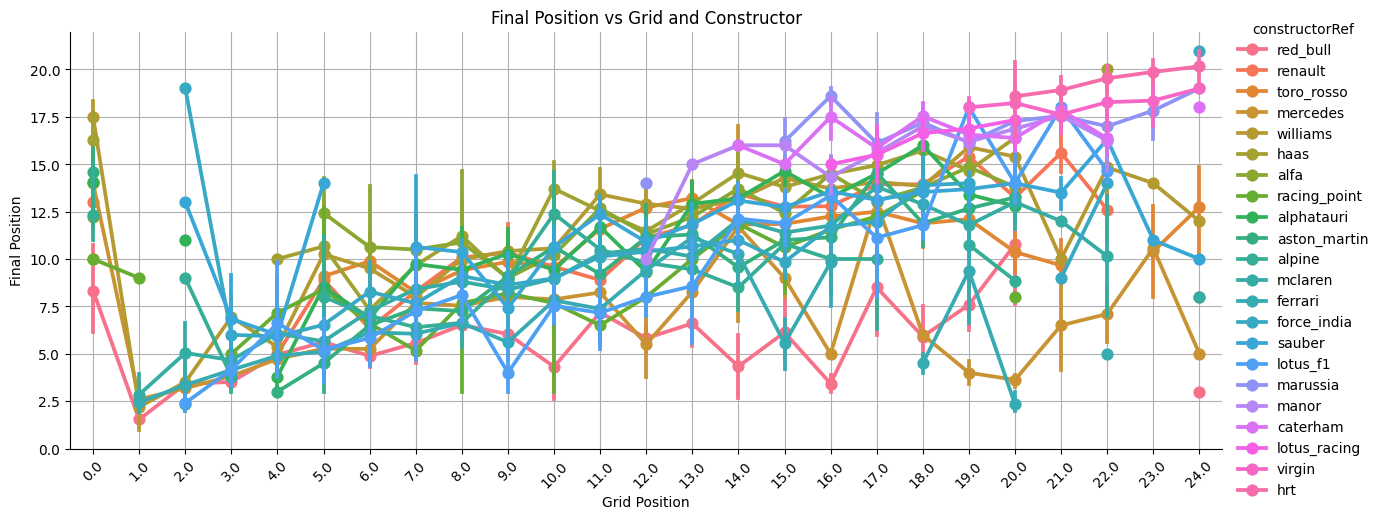

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical plot for grid and constructorRef against final position
plt.figure(figsize=(12, 6))
sns.catplot(x='grid_position', y='final_position', hue='constructorRef', data=final_df, kind='point', aspect=2.5)
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.title('Final Position vs Grid and Constructor')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analysis 2: **Impact of Engine Changes on F1 Performance: Analyzing Lap Time Variations Across Key Seasons**

In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid_position', 'final_position', 'positionText', 'positionOrder',
       'points', 'laps', 'race_time', 'race_time_milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'circuitId', 'circuit_name', 'date', 'stop', 'lap', 'time',
       'duration', 'pitstop_time_milliseconds', 'constructorRef',
       'constructor_name', 'nationality', 'url', 'predicted_position'],
      dtype='object')

In [ ]:
final_df['fastestLapTime']

0       1:29.844
1       1:29.844
2       1:29.600
3       1:29.600
4       1:29.600
          ...   
9219    1:09.786
9220    1:31.539
9221    1:50.439
9222    1:50.439
9223    1:50.911
Name: fastestLapTime, Length: 9224, dtype: object

In [ ]:
import numpy as np

def lap_time_to_ms(lap_time):
    if pd.isna(lap_time):
        return np.nan
    components = str(lap_time).split(':')
    if len(components) < 2:
        return np.nan
    minutes = int(components[0])

    # Split seconds and milliseconds
    seconds, milliseconds = map(float, components[1].split('.'))

    # Convert to milliseconds
    total_ms = minutes * 60 * 1000 + seconds * 1000 + milliseconds
    return total_ms

# Apply the function to convert lap times to milliseconds
final_df['fastestLapTime_ms'] = final_df['fastestLapTime'].apply(lap_time_to_ms)


In [ ]:
final_df

resultId  raceId  driverId  constructorId number  grid_position  \
0        20779     841        20              9      1            1.0   
1        20779     841        20              9      1            1.0   
2        20783     841        17              9      2            3.0   
3        20783     841        17              9      2            3.0   
4        20783     841        17              9      2            3.0   
...        ...     ...       ...            ...    ...            ...   
9219     26019    1107       839            214     31           12.0   
9220     26043    1108       842            214     10           10.0   
9221     26073    1110       839            214     31           14.0   
9222     26073    1110       839            214     31           14.0   
9223     26076    1110       842            214     10           12.0   

      final_position positionText  positionOrder  points  ...  lap      time  \
0                1.0            1              1    25.0  ...   14  17:25:17   
1                1.0            1              1    25.0  ...   36  17:59:17   
2                5.0            5              5    10.0  ...   11  17:20:48   
3                5.0            5              5    10.0  ...   26  17:44:29   
4                5.0            5              5    10.0  ...   41  18:07:37   
...              ...          ...            ...     ...  ...  ...       ...   
9219            14.0           14             14     0.0  ...   40  15:52:55   
9220            18.0           18             18     0.0  ...   31  15:51:30   
9221             8.0            8              8     4.0  ...    6  15:15:23   
9222             8.0            8              8     4.0  ...   25  15:51:50   
9223            11.0           11             11     0.0  ...   23  15:48:00   

     duration pitstop_time_milliseconds constructorRef constructor_name  \
0      22.603                     22603       red_bull         Red Bull   
1      24.036                     24036       red_bull         Red Bull   
2      23.426                     23426       red_bull         Red Bull   
3      22.520                     22520       red_bull         Red Bull   
4      26.230                     26230       red_bull         Red Bull   
...       ...                       ...            ...              ...   
9219   30.427                     30427         alpine   Alpine F1 Team   
9220   28.458                     28458         alpine   Alpine F1 Team   
9221   23.085                     23085         alpine   Alpine F1 Team   
9222   23.339                     23339         alpine   Alpine F1 Team   
9223   25.664                     25664         alpine   Alpine F1 Team   

     nationality                                           url  \
0       Austrian  http://en.wikipedia.org/wiki/Red_Bull_Racing   
1       Austrian  http://en.wikipedia.org/wiki/Red_Bull_Racing   
2       Austrian  http://en.wikipedia.org/wiki/Red_Bull_Racing   
3       Austrian  http://en.wikipedia.org/wiki/Red_Bull_Racing   
4       Austrian  http://en.wikipedia.org/wiki/Red_Bull_Racing   
...          ...                                           ...   
9219      French   http://en.wikipedia.org/wiki/Alpine_F1_Team   
9220      French   http://en.wikipedia.org/wiki/Alpine_F1_Team   
9221      French   http://en.wikipedia.org/wiki/Alpine_F1_Team   
9222      French   http://en.wikipedia.org/wiki/Alpine_F1_Team   
9223      French   http://en.wikipedia.org/wiki/Alpine_F1_Team   

      predicted_position  fastestLapTime_ms  
0               4.438034            89844.0  
1               4.438034            89844.0  
2               4.438034            89600.0  
3               4.438034            89600.0  
4               4.438034            89600.0  
...                  ...                ...  
9219            8.810345            69786.0  
9220            8.810345            91539.0  
9221            8.810345           110439.0  
9222          

In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid_position', 'final_position', 'positionText', 'positionOrder',
       'points', 'laps', 'race_time', 'race_time_milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'circuitId', 'circuit_name', 'date', 'stop', 'lap', 'time',
       'duration', 'pitstop_time_milliseconds', 'constructorRef',
       'constructor_name', 'nationality', 'url', 'predicted_position',
       'fastestLapTime_ms'],
      dtype='object')

In [ ]:
# Filter data for 2013
data_2013 = final_df[final_df['year'] == 2013]
fastest_lap_times_2013 = data_2013['fastestLapTime']

# Filter data for 2014
data_2014 = final_df[final_df['year'] == 2014]
fastest_lap_times_2014 = data_2014['fastestLapTime']

print("Fastest Lap Times in 2013:")
print(fastest_lap_times_2013)

print("\nFastest Lap Times in 2014:")
print(fastest_lap_times_2014)

Fastest Lap Times in 2013:
186     1:30.409
187     1:30.409
188     1:30.409
189     1:29.732
190     1:29.732
          ...   
7500    1:43.968
7501    1:43.968
7502    1:17.590
7503    1:17.590
7504    1:17.590
Name: fastestLapTime, Length: 890, dtype: object

Fastest Lap Times in 2014:
267     1:44.289
268     1:44.289
269     1:44.289
270     1:39.269
271     1:39.269
          ...   
7549    1:55.641
7550    1:43.979
7551    1:43.979
7552    1:48.398
7553    1:48.398
Name: fastestLapTime, Length: 731, dtype: object


In [ ]:
final_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid_position', 'final_position', 'positionText', 'positionOrder',
       'points', 'laps', 'race_time', 'race_time_milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'circuitId', 'circuit_name', 'date', 'stop', 'lap', 'time',
       'duration', 'pitstop_time_milliseconds', 'constructorRef',
       'constructor_name', 'nationality', 'url', 'predicted_position',
       'fastestLapTime_ms'],
      dtype='object')

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Filter data for 2021
data_2013 = final_df[final_df['year'] == 2013]
fastest_lap_times_2013 = data_2013.groupby('driverId')['fastestLapTime_ms'].mean()

# Filter data for 2022
data_2014 = final_df[final_df['year'] == 2014]
fastest_lap_times_2014 = data_2014.groupby('driverId')['fastestLapTime_ms'].mean()

# Combine the data into a single DataFrame with inner join
df = pd.concat([fastest_lap_times_2013, fastest_lap_times_2014], axis=1, join='inner')
df.columns = ['2013 Avg Lap Time', '2014 Avg Lap Time']

# Create a categorical x-axis with driver IDs
driver_ids = df.index.astype(str)

# Create the trace for 2021
trace1 = go.Bar(
    x=driver_ids,
    y=df['2013 Avg Lap Time'],
    name='2013 Avg Lap Time',
    marker=dict(color='rgba(55, 128, 191, 0.7)'),
    offset=-0.2,  # Shift left by 0.2 for 2021
)

# Create the trace for 2022
trace2 = go.Bar(
    x=driver_ids,
    y=df['2014 Avg Lap Time'],
    name='2014 Avg Lap Time',
    marker=dict(color='rgba(219, 64, 82, 0.7)'),
    offset=0.2,  # Shift right by 0.2 for 2022
)

# Create the layout
layout = go.Layout(
    title='2013 vs 2014 Average Lap Time by Driver',
    xaxis=dict(title='Driver ID'),
    yaxis=dict(title='Average Lap Time (ms)'),
    barmode='group',
    bargap=0.8,  # Gap between bars of the same group
)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the interactive plot
iplot(fig)


In [ ]:
from scipy.stats import ttest_ind

# Filter lap times for 2013 and 2014
lap_times_2013 = final_df.loc[final_df['year'] == 2013, 'fastestLapTime_ms']
lap_times_2014 = final_df.loc[final_df['year'] == 2014, 'fastestLapTime_ms']

# Perform t-test
t_statistic, p_value = ttest_ind(lap_times_2013, lap_times_2014, equal_var=False)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -2.7047322625465324
P-value: 0.006925969052776483


T-statistic:
−
2.704732262546532 This negative value indicates that the mean fastest lap time in 2014 is lower than in 2013, suggesting that lap times were increased in 2014 compared to 2013. Suggesting a degradation in the performance in 2014 after the engine changes

P-value:
0.006925969052776483
0.006925969052776483 — Since this p-value is less than the typical alpha level of 0.05, you can reject the null hypothesis. This result suggests that the differences in lap times between the two years are statistically significant, and not due to random chance.

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Filter data for 2021
data_2021 = final_df[final_df['year'] == 2021]
fastest_lap_times_2021 = data_2021.groupby('driverId')['fastestLapTime_ms'].mean()

# Filter data for 2022
data_2022 = final_df[final_df['year'] == 2022]
fastest_lap_times_2022 = data_2022.groupby('driverId')['fastestLapTime_ms'].mean()

# Combine the data into a single DataFrame with inner join
df = pd.concat([fastest_lap_times_2021, fastest_lap_times_2022], axis=1, join='inner')
df.columns = ['2021 Avg Lap Time', '2022 Avg Lap Time']

# Create a categorical x-axis with driver IDs
driver_ids = df.index.astype(str)

# Create the trace for 2021
trace1 = go.Bar(
    x=driver_ids,
    y=df['2021 Avg Lap Time'],
    name='2021 Avg Lap Time',
    marker=dict(color='rgba(55, 128, 191, 0.7)'),
    offset=-0.2,  # Shift left by 0.2 for 2021
)

# Create the trace for 2022
trace2 = go.Bar(
    x=driver_ids,
    y=df['2022 Avg Lap Time'],
    name='2022 Avg Lap Time',
    marker=dict(color='rgba(219, 64, 82, 0.7)'),
    offset=0.2,  # Shift right by 0.2 for 2022
)

# Create the layout
layout = go.Layout(
    title='2021 vs 2022 Average Lap Time by Driver',
    xaxis=dict(title='Driver ID'),
    yaxis=dict(title='Average Lap Time (ms)'),
    barmode='group',
    bargap=0.8,  # Gap between bars of the same group
)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the interactive plot
iplot(fig)


In [ ]:
from scipy.stats import ttest_ind

# Filter lap times for 2013 and 2014
lap_times_2013 = final_df.loc[final_df['year'] == 2021, 'fastestLapTime_ms']
lap_times_2014 = final_df.loc[final_df['year'] == 2022, 'fastestLapTime_ms']

# Perform t-test
t_statistic, p_value = ttest_ind(lap_times_2013, lap_times_2014, equal_var=False)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -4.4477655755112115
P-value: 9.328846895903067e-06


T-statistic:
−
4.4477655755112115 — This negative value indicates that the average fastest lap time in 2022 is more than in 2021, suggesting that cars were generally faster in 2021 compared to 2022.

P-value:
9.328846895903067e−06 — This p-value is significantly below the typical alpha level of 0.05, indicating that the differences in lap times between 2021 and 2022 are statistically significant and unlikely due to random variation.

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Filter data for 2014
data_2014 = final_df[final_df['year'] == 2014]
fastest_lap_times_2014 = data_2014.groupby('driverId')['fastestLapTime_ms'].mean()

# Filter data for 2022
data_2022 = final_df[final_df['year'] == 2022]
fastest_lap_times_2022 = data_2022.groupby('driverId')['fastestLapTime_ms'].mean()

# Combine the data into a single DataFrame with inner join
df = pd.concat([fastest_lap_times_2014, fastest_lap_times_2022], axis=1, join='inner')
df.columns = ['2014 Avg Lap Time', '2022 Avg Lap Time']

# Create a categorical x-axis with driver IDs
driver_ids = df.index.astype(str)

# Create the trace for 2014
trace1 = go.Bar(
    x=driver_ids,
    y=df['2014 Avg Lap Time'],
    name='2014 Avg Lap Time',
    marker=dict(color='rgba(55, 128, 191, 0.7)'),
    offset=-0.2,  # Shift left by 0.2 for 2014
)

# Create the trace for 2022
trace2 = go.Bar(
    x=driver_ids,
    y=df['2022 Avg Lap Time'],
    name='2022 Avg Lap Time',
    marker=dict(color='rgba(219, 64, 82, 0.7)'),
    offset=0.2,  # Shift right by 0.2 for 2022
)

# Create the layout
layout = go.Layout(
    title='2014 vs 2022 Average Lap Time by Driver',
    xaxis=dict(title='Driver ID'),
    yaxis=dict(title='Average Lap Time (ms)'),
    barmode='group',
    bargap=0.8,  # Gap between bars of the same group
)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the interactive plot
iplot(fig)


In [ ]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(df['2014 Avg Lap Time'], df['2022 Avg Lap Time'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between 2014 and 2022 lap times.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between 2014 and 2022 lap times.")


T-statistic: 6.273099137331169
P-value: 0.00041478410312145665
Reject the null hypothesis. There is a significant difference between 2014 and 2022 lap times.


T-statistic:
6.273099137331169
6.273099137331169 — This positive value indicates a higher average lap time in 2014 compared to 2022, suggesting that cars were generally faster in 2022 than they were in 2014.

P-value:
0.00041478410312145665
0.00041478410312145665 — This very low p-value is well below the conventional alpha level of 0.05, strongly indicating that the differences observed in lap times are statistically significant.

# Analysis 3: **Number of pitstops impact on Performance**

In [ ]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats

# Assuming you have the necessary dataframes named pitstops_df and results_df

# Step 1: Calculate the total number of pit stops for each driver
pitstops_summary = pitstops_df.groupby('driverId')['stop'].count().reset_index()
pitstops_summary.columns = ['driverId', 'num_pit_stops']

# Step 2: Merge the pit stop data with the finishing position data
merged_data = pd.merge(results_df, pitstops_summary, on='driverId', how='inner')

# Step 3: Plot an interactive visualization
fig = px.scatter(merged_data, x='positionOrder', y='num_pit_stops',
                 labels={'positionOrder': 'Finishing Position', 'num_pit_stops': 'Number of Pit Stops'},
                 title='Number of Pit Stops vs. Finishing Position', trendline = 'ols',
                 hover_name='driverId', hover_data={'num_pit_stops': True, 'positionOrder': True})
fig.update_traces(marker=dict(size=8, opacity=0.6))
fig.show()

In [ ]:
# Step 4: Conduct a statistical test (e.g., Pearson correlation)
pearson_corr, p_value = stats.pearsonr(merged_data['positionOrder'], merged_data['num_pit_stops'])

print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", p_value)

Pearson correlation coefficient: -0.3206792017309289
P-value: 1.3390956706973803e-188


The Pearson correlation coefficient of -0.3206792017309289 suggests a moderate negative relationship between positionOrder and num_pit_stops,
This result implies that as the number of pit stops increases, the position order tends to be better (a lower position order number indicates a better finish in a race). But the coorelation is not so strong, its a very weak corelation

In [ ]:
# Specify the model relationship using column titles and fit the model
fastest_lap_model = smf.ols(formula='positionOrder ~  num_pit_stops ', data=merged_data).fit()

# Summarize the model
fastest_lap_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          positionOrder   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     906.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.34e-188
Time:                        19:27:54   Log-Likelihood:                -25362.
No. Observations:                7909   AIC:                         5.073e+04
Df Residuals:                    7907   BIC:                         5.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8487      0.122    113.390      0.000      13.609      14.088
num_pit_stops    -0.0136      0.000    -30.105      0.000      -0.014      -0.013
==============================================================================
Omnibus:                      727.460   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.309
Skew:                           0.172   Prob(JB):                     9.88e-56
Kurtosis:                       2.194   Cond. No.                         492.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.103 suggests that about 10.3% of the variability in the position order can be explained by the number of pit stops. While this indicates some level of predictive power, it also suggests that there are many other factors influencing race outcomes that are not captured by this model.The coefficient of -0.0136 indicates that each additional pit stop is associated with a slight improvement in the position order (i.e., a lower position number which means a better finish). This relationship is statistically significant given the very small p-value (< 0.0001).

# Analysis 4 : **Global Impact Analysis: Evaluating Formula 1 Performance Metrics Across Different Countries**

**Total average points for each country**

In [ ]:
# Merge race information with circuit information to determine the country for each race
race_country = pd.merge(races_df, circuits_df[['circuitId', 'country']], on='circuitId', how='left')

In [ ]:
race_country

raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1096    1116  2023     18         69  United States Grand Prix  2023-10-22   
1097    1117  2023     19         32    Mexico City Grand Prix  2023-10-29   
1098    1118  2023     20         18     SÃ£o Paulo Grand Prix  2023-11-05   
1099    1119  2023     21         80      Las Vegas Grand Prix  2023-11-19   
1100    1120  2023     22         24      Abu Dhabi Grand Prix  2023-11-26   

          time                                                url    fp1_date  \
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...          \N   
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...          \N   
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...          \N   
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...          \N   
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...          \N   
...        ...                                                ...         ...   
1096  19:00:00  https://en.wikipedia.org/wiki/2023_United_Stat...  2023-10-20   
1097  20:00:00  https://en.wikipedia.org/wiki/2023_Mexico_City...  2023-10-27   
1098  17:00:00  https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...  2023-11-03   
1099  06:00:00  https://en.wikipedia.org/wiki/2023_Las_Vegas_G...  2023-11-17   
1100  13:00:00  https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...  2023-11-24   

      fp1_time    fp2_date  fp2_time    fp3_date  fp3_time  quali_date  \
0           \N          \N        \N          \N        \N          \N   
1           \N          \N        \N          \N        \N          \N   
2           \N          \N        \N          \N        \N          \N   
3           \N          \N        \N          \N        \N          \N   
4           \N          \N        \N          \N        \N          \N   
...        ...         ...       ...         ...       ...         ...   
1096  17:30:00  2023-10-21  18:00:00          \N        \N  2023-10-20   
1097  18:30:00  2023-10-27  22:00:00  2023-10-28  17:30:00  2023-10-28   
1098  14:30:00  2023-11-04  14:30:00          \N        \N  2023-11-03   
1099  04:30:00  2023-11-17  08:00:00  2023-11-18  04:30:00  2023-11-18   
1100  09:30:00  2023-11-24  13:00:00  2023-11-25  10:30:00  2023-11-25   

     quali_time sprint_date sprint_time        country  
0            \N          \N          \N      Australia  
1            \N          \N          \N       Malaysia  
2            \N          \N          \N          China  
3            \N          \N          \N        Bahrain  
4            \N          \N          \N          Spain  
...         ...         ...         ...            ...  
1096   21:00:00  2023-10-21    22:00:00            USA  
1097   21:00:00          \N          \N         Mexico  
1098   18:00:00  2023-11-04    18:30:00         Brazil  
1099   08:00:00          \N          \N  United States  
1100   14:00:00          \N          \N            UAE  

[1101 rows x 19 columns]

In [ ]:
# Merge race_country with results_df on raceId
merged_df = pd.merge(race_country, results_df, on='raceId')

# Merge merged_df with drivers_df on driverId
merged_df = pd.merge(merged_df, drivers_df, on='driverId')

In [ ]:
merged_df

raceId  year  round  circuitId                   name        date  \
0           1  2009      1          1  Australian Grand Prix  2009-03-29   
1           2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2           3  2009      3         17     Chinese Grand Prix  2009-04-19   
3           4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4           5  2009      5          4     Spanish Grand Prix  2009-05-10   
...       ...   ...    ...        ...                    ...         ...   
26075    1106  2023      8          7    Canadian Grand Prix  2023-06-18   
26076    1107  2023      9         70    Austrian Grand Prix  2023-07-02   
26077    1108  2023     10          9     British Grand Prix  2023-07-09   
26078    1109  2023     11         11   Hungarian Grand Prix  2023-07-23   
26079    1110  2023     12         13     Belgian Grand Prix  2023-07-30   

         time_x                                              url_x  \
0      06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...   
1      09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...   
2      07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...   
3      12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...   
4      12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...   
...         ...                                                ...   
26075  18:00:00  https://en.wikipedia.org/wiki/2023_Canadian_Gr...   
26076  13:00:00  https://en.wikipedia.org/wiki/2023_Austrian_Gr...   
26077  14:00:00  https://en.wikipedia.org/wiki/2023_British_Gra...   
26078  13:00:00  https://en.wikipedia.org/wiki/2023_Hungarian_G...   
26079  13:00:00  https://en.wikipedia.org/wiki/2023_Belgian_Gra...   

         fp1_date  fp1_time  ... fastestLapSpeed statusId driverRef number_y  \
0              \N        \N  ...         216.891        1    button       22   
1              \N        \N  ...         206.483        1    button       22   
2              \N        \N  ...         172.825        1    button       22   
3              \N        \N  ...         205.979        1    button       22   
4              \N        \N  ...         202.149        1    button       22   
...           ...       ...  ...             ...      ...       ...      ...   
26075  2023-06-16  17:30:00  ...         204.960        1   piastri       81   
26076  2023-06-30  11:30:00  ...         222.259       11   piastri       81   
26077  2023-07-07  11:30:00  ...         233.435        1   piastri       81   
26078  2023-07-21  11:30:00  ...         190.625        1   piastri       81   
26079  2023-07-28  11:30:00  ...              \N      130   piastri       81   

      code forename  surname         dob nationality  \
0      BUT   Jenson   Button  1980-01-19     British   
1      BUT   Jenson   Button  1980-01-19     British   
2      BUT   Jenson   Button  1980-01-19     British   
3      BUT   Jenson   Button  1980-01-19     British   
4      BUT   Jenson   Button  1980-01-19     British   
...    ...      ...      ...         ...         ...   
26075  PIA    Oscar  Piastri  2001-04-06  Australian   
26076  PIA    Oscar  Piastri  2001-04-06  Australian   
26077  PIA    Oscar  Piastri  2001-04-06  Australian   
26078  PIA    Oscar  Piastri  2001-04-06  Australian   
26079  PIA    Oscar  Piastri  2001-04-06  Australian   

                                            url_y  
0      http://en.wikipedia.org/wiki/Jenson_Button  
1      http://en.wikipedia.org/wiki/Jenson_Button  
2      http://en.wikipedia.org/wiki/Jenson_Button  
3      http://en.wikipedia.org/wiki/Jenson_Button  
4      http://en.wikipedia.org/wiki/Jenson_Button  
...                                           ...  
26075  http://en.wikipedia.org/wiki/Oscar_Piastri  
26076  http://en.wikipedia.org/wiki/Oscar_Piastri  
26077  http://en.wikipedia.org/wiki/Oscar_Piastri  
26078  http://en.wikipedia.org/wiki/Oscar_Piastri  
26079  http://en.wikipedia.org/wiki/Oscar_Piast

In [ ]:
merged_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time_x',
       'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
       'country', 'resultId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url_y'],
      dtype='object')

In [ ]:
import pandas as pd

# Merge races, results, drivers, and circuits dataframes
merged_df = pd.merge(results_df, races_df, on='raceId')
merged_df = pd.merge(merged_df, drivers_df, on='driverId')
merged_df = pd.merge(merged_df, circuits_df, on='circuitId')

# Group by country and driver
country_driver_group = merged_df.groupby(['country', 'driverId'])

# Calculate average points per race and average finishing position per race
average_performance = country_driver_group.agg({
    'points': 'mean',
    'positionOrder': 'mean'
})

# Reset index to make 'country' and 'driverId' columns again
average_performance.reset_index(inplace=True)

# Display the resulting dataframe
print(average_performance)

        country  driverId  points  positionOrder
0     Argentina        14    0.25      13.500000
1     Argentina        15    0.00      10.000000
2     Argentina        21    0.00      12.000000
3     Argentina        22    0.75      12.250000
4     Argentina        23    2.00      11.000000
...         ...       ...     ...            ...
6574        USA       854    0.00      15.333333
6575        USA       855    0.00      16.000000
6576        USA       856    0.00      18.000000
6577        USA       857    0.00      19.000000
6578        USA       858    0.00      20.000000

[6579 rows x 4 columns]


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Aggregate the data to calculate the total average points for each country
total_average_points = merged_df.groupby('country')['points'].sum().reset_index()

# Create the choropleth plot
choropleth_data = go.Choropleth(
    locations=[str(country).lower() for country in total_average_points['country']],
    locationmode='country names',
    z=total_average_points['points'],
    text=total_average_points['country'],
    colorscale='sunset',
    colorbar={'title': 'Total Average Points per Country'}
)

# Define the layout for the choropleth plot
layout = dict(
    geo={'scope': 'world', 'projection': {'type': 'natural earth'}}
)

# Create the choropleth plot
choropleth_map = go.Figure(data=[choropleth_data], layout=layout)

# Plot the choropleth map
iplot(choropleth_map)


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

# Aggregate the data to calculate the total average points for each country
total_average_points = merged_df.groupby('country')['points'].sum().reset_index()

# Sort the data by total points
total_average_points = total_average_points.sort_values(by='points', ascending=False)

# Create the bar plot
bar_plot = go.Bar(
    x=total_average_points['country'],
    y=total_average_points['points'],
    marker={'color': 'orange'},  # Color of the bars
    hoverinfo='y'  # Show only the y value on hover
)

# Define layout
layout = go.Layout(
    title='Total Average Points per Country',
    xaxis={'title': 'Country'},
    yaxis={'title': 'Total Average Points'},
    hovermode='closest'  # Show closest data point on hover
)

# Create figure
fig = go.Figure(data=[bar_plot], layout=layout)

# Plot bar plot
iplot(fig)


For total countries

In [ ]:
from scipy.stats import f_oneway

# Extract points data for each country
points_by_country = [merged_df[merged_df['country'] == country]['points'] for country in merged_df['country'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*points_by_country)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 28.201483012905125
p-value: 7.18537355394048e-171


These results indicate a very strong statistical significance. The F-statistic is relatively high, which implies that there are significant differences in the average points scored between different countries. The extremely low p-value further supports this finding, suggesting that these differences are statistically significant and not likely due to random variation.

Countries with better infrastructure and resources dedicated to motorsports can develop more skilled drivers and more competitive teams. This might include better racing circuits, more comprehensive training facilities, and greater access to motorsport technology. Analyzing the correlation between these infrastructural factors and the average points could yield insights into how much of an impact they have on performance.

# Fun little part Analysis 6: **Hamilton X ray**

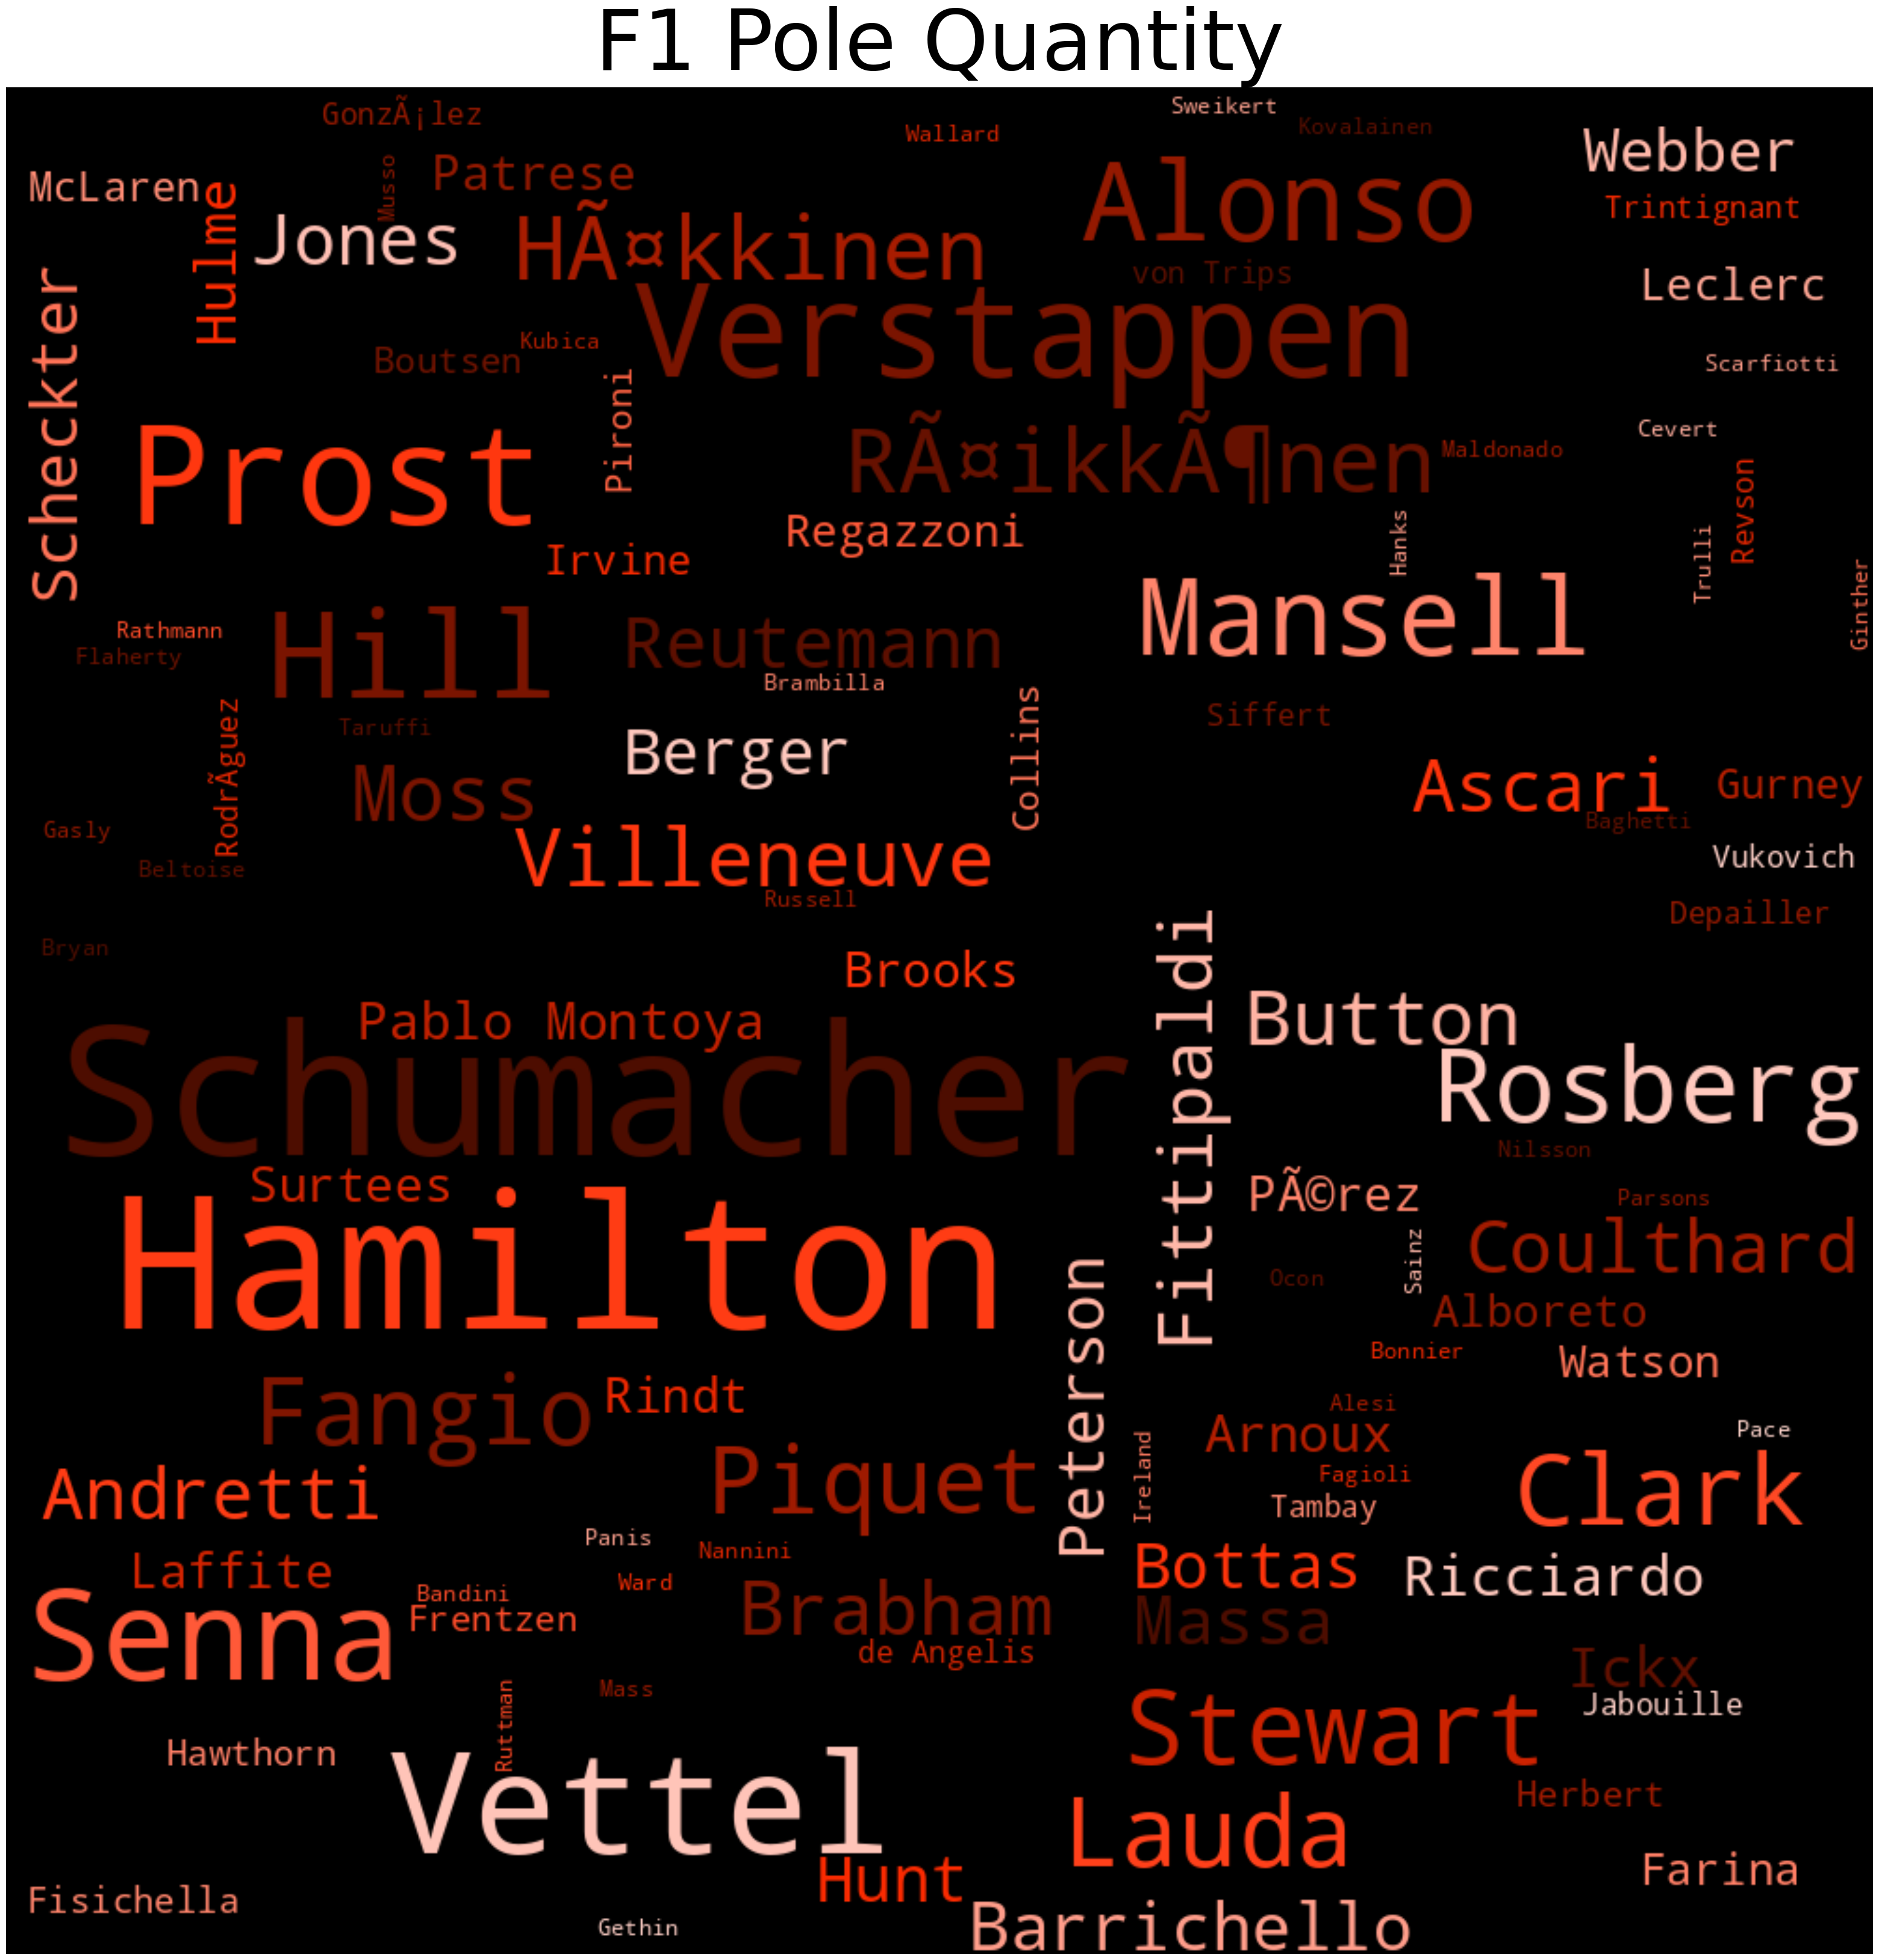

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import random
import matplotlib.pyplot as plt

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(15, 90)

# Merge DataFrames
merged_df = pd.merge(results_df, drivers_df, on='driverId', how='left')
merged_df = pd.merge(merged_df, races_df, on='raceId', how='left')
merged_df = merged_df.loc[merged_df['positionOrder'] == 1]

# Extract array of driver names who achieved pole position
array = list(merged_df['surname'].values)

# Create a Counter object to count the frequency of each driver
word_cloud_dict = Counter(array)

# Remove incorrect entries
word_cloud_dict.pop('Kimi RÌ_ikkÌ¦nen', None)
word_cloud_dict.pop('Mika HÌ_kkinen', None)

# Generate word cloud
wordcloud = WordCloud(width=1000, height=1000, max_font_size=100).generate_from_frequencies(word_cloud_dict)

# Display the word cloud
plt.figure(figsize=(40, 50))
plt.title("F1 Pole Quantity", fontsize=100)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.show()


His favorite grand prix

In [ ]:
import plotly.graph_objects as go

# Merge DataFrames
merged_df = pd.merge(results_df.loc[results_df['driverId'] == 1], races_df, on='raceId', how='inner')
merged_df = merged_df.loc[merged_df['positionOrder'] == 1].groupby('name')['driverId'].count().sort_values()

# Create bar trace
bar_trace = go.Bar(x=list(merged_df.values),
                   y=list(merged_df.index),
                   orientation='h',
                   marker=dict(color=list(merged_df.values),
                               colorscale='blues',
                               colorbar=dict(title='Total Victories')))

# Create layout
layout = go.Layout(title="Victory by Gran Prix",
                   xaxis=dict(title='Total', tickfont=dict(size=20)),
                   yaxis=dict(title='Gran Prix', tickfont=dict(size=20)),
                   width=1000,  # Adjust the width here
                   height=800,
                   plot_bgcolor='whitesmoke')

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show interactive bar chart
fig.show()


Comparision

In [ ]:
merged_df = pd.merge(results_df.loc[results_df['driverId'] == 1], races_df, on='raceId', how='inner')
merged_df = merged_df.loc[merged_df['positionOrder'] == 1].groupby('name')['driverId'].count().sort_values()

In [ ]:
merged_df

name
Eifel Grand Prix             1
Malaysian Grand Prix         1
Tuscan Grand Prix            1
Saudi Arabian Grand Prix     1
Emilia Romagna Grand Prix    1
Styrian Grand Prix           1
SÃ£o Paulo Grand Prix        1
Qatar Grand Prix             1
Azerbaijan Grand Prix        1
Austrian Grand Prix          1
Portuguese Grand Prix        2
Turkish Grand Prix           2
French Grand Prix            2
Australian Grand Prix        2
Mexican Grand Prix           2
Brazilian Grand Prix         2
Monaco Grand Prix            3
Belgian Grand Prix           4
Singapore Grand Prix         4
German Grand Prix            4
Russian Grand Prix           5
Abu Dhabi Grand Prix         5
Italian Grand Prix           5
Bahrain Grand Prix           5
Japanese Grand Prix          5
Chinese Grand Prix           6
Spanish Grand Prix           6
United States Grand Prix     6
Canadian Grand Prix          7
Hungarian Grand Prix         8
British Grand Prix           8
Name: driverId, dtype: int64

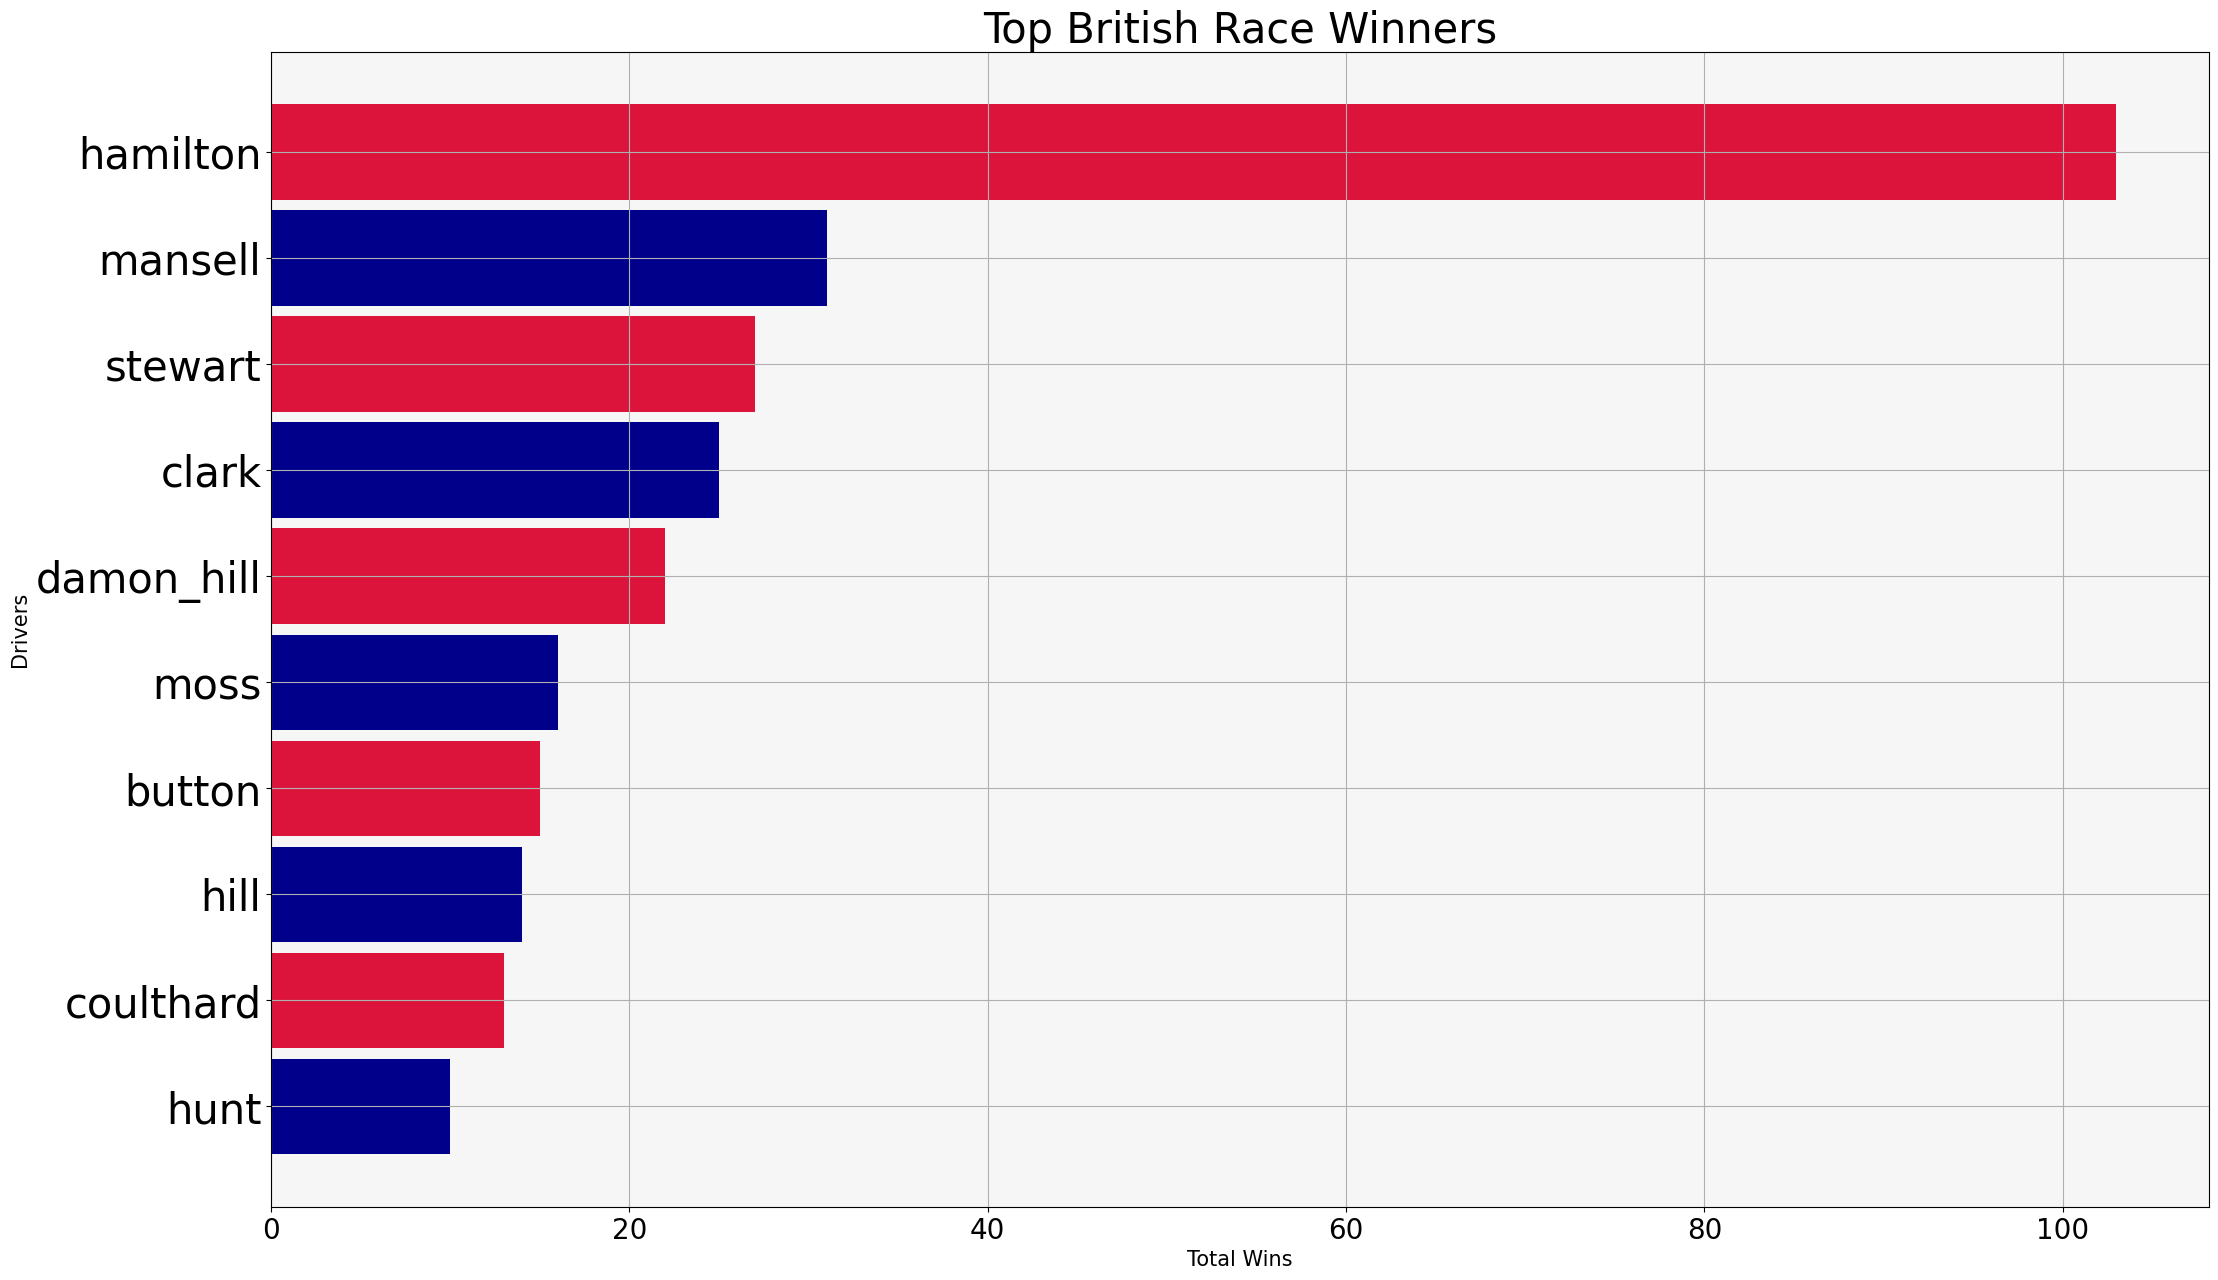

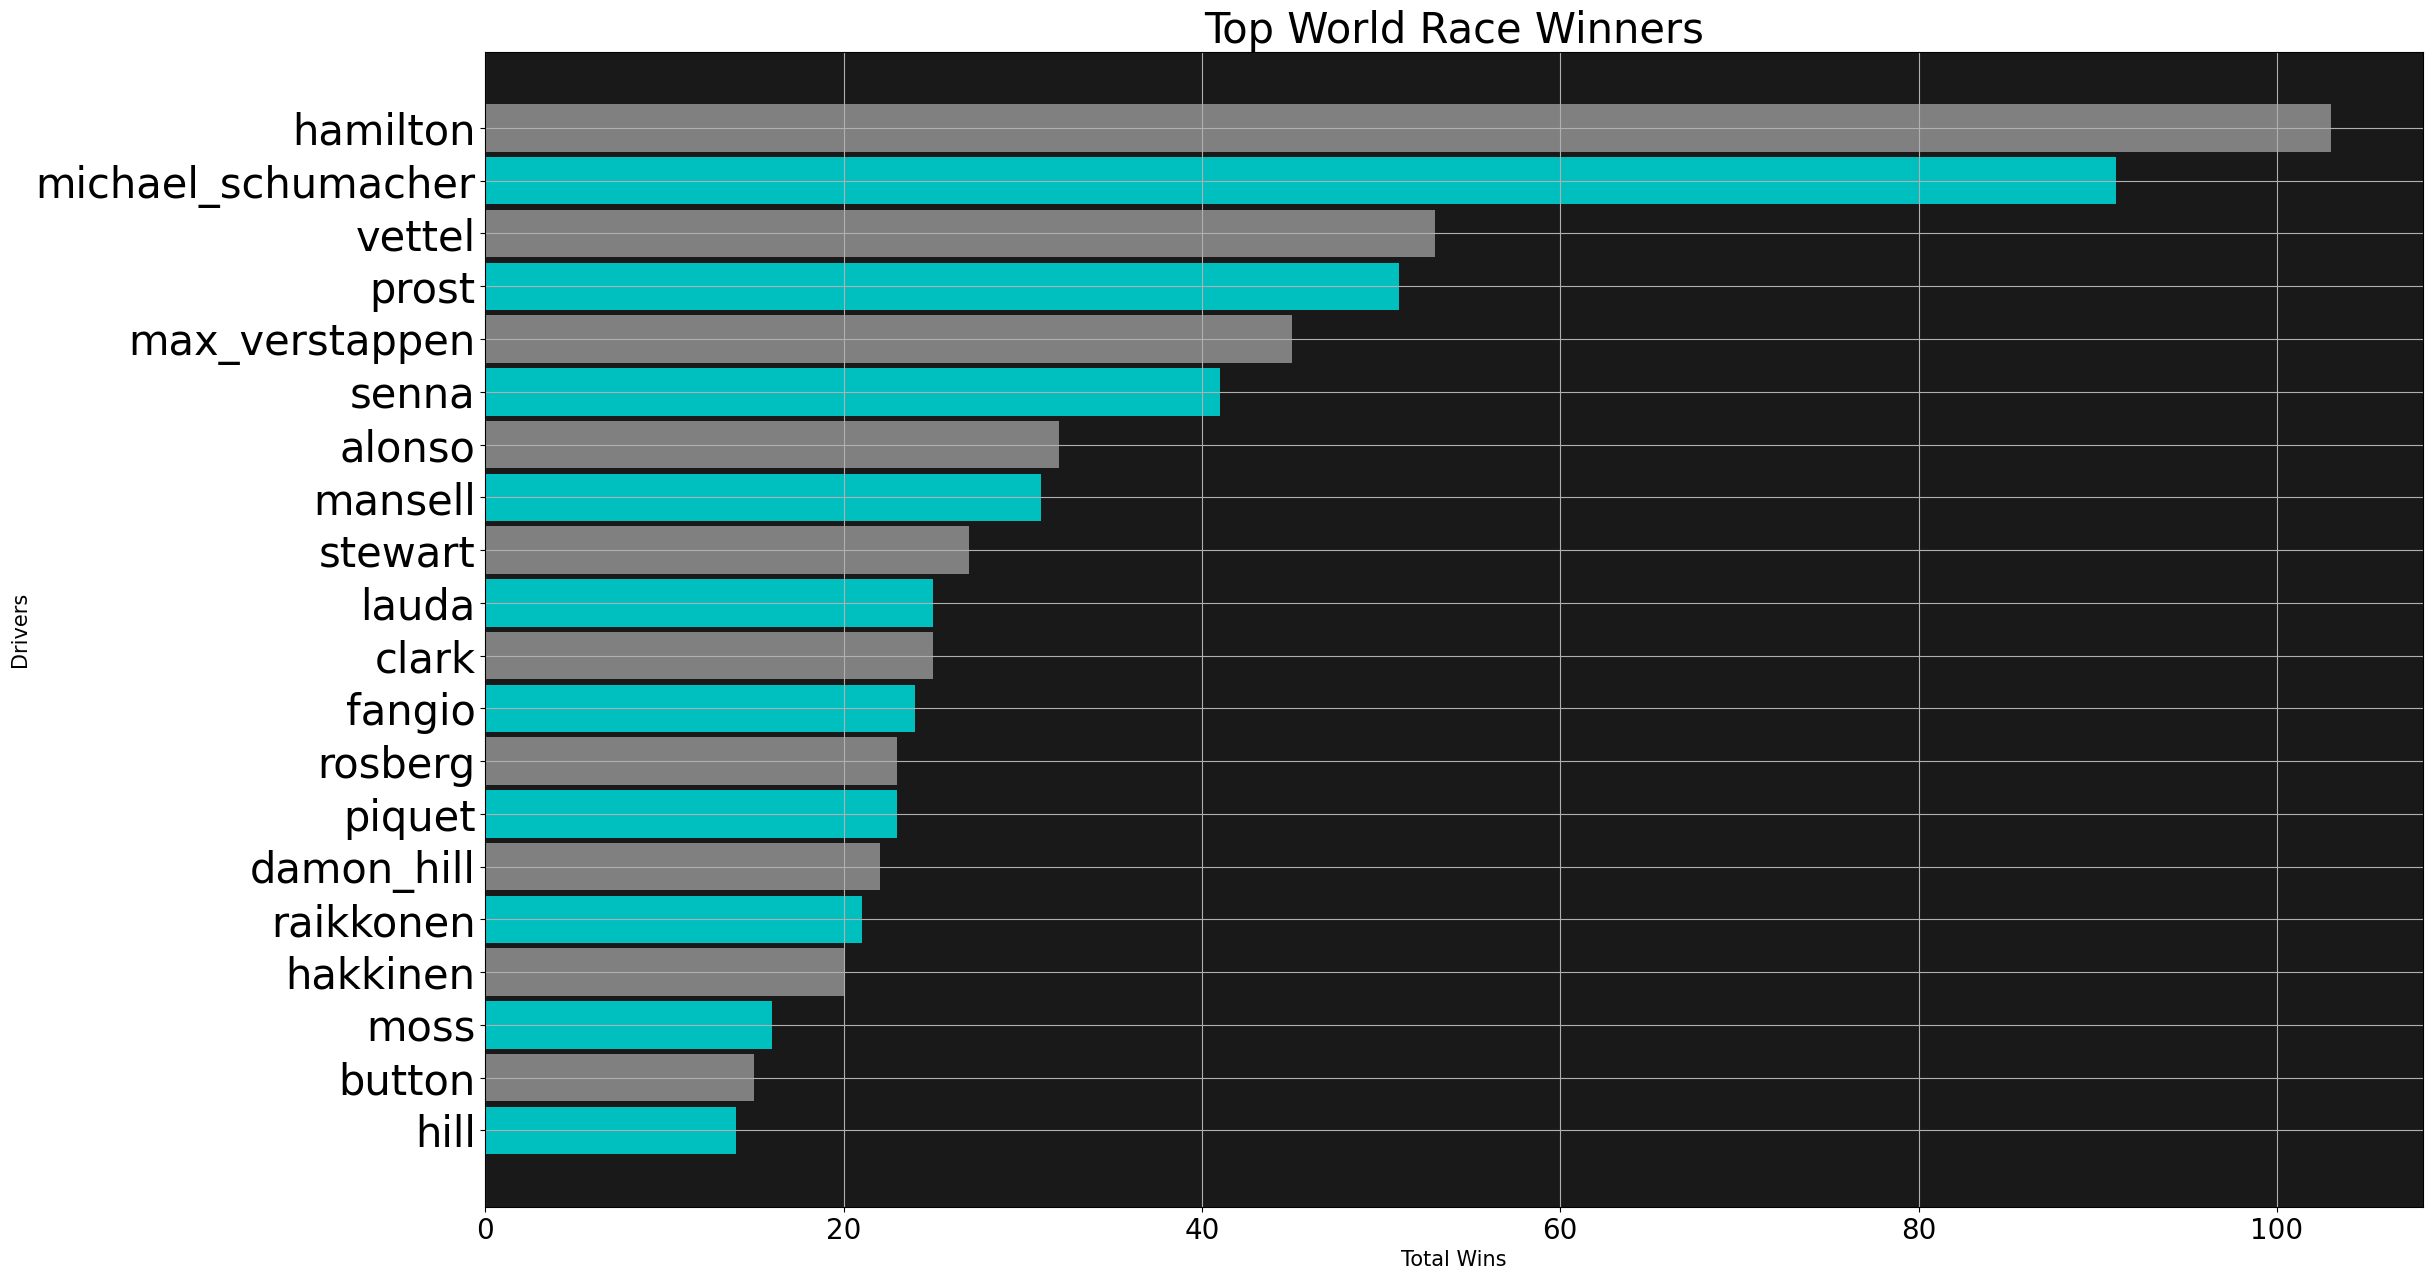

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge results with drivers to get nationality information
merged_results = pd.merge(results_df, drivers_df, on='driverId', how='left')

# Filter results for British drivers
topBritish = merged_results.loc[(merged_results['nationality'] == 'British') & (merged_results['positionOrder'] == 1)].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:10]
topBritish = topBritish.sort_values()

# Filter results for World drivers
topWorld = merged_results.loc[merged_results['positionOrder'] == 1].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:20]
topWorld = topWorld.sort_values()

# Plotting the top British race winners
f, ax = plt.subplots(figsize=(25, 15))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=30)

ax.barh(list(topBritish.index), list(topBritish.values), height=0.9, color=['darkblue', 'crimson'])
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(0.9)
plt.title("Top British Race Winners", fontsize=30)
plt.ylabel('Drivers', fontsize=15)
plt.xlabel('Total Wins', fontsize=15)
plt.grid()
plt.show()

# Plotting the top World race winners
f, ax = plt.subplots(figsize=(25, 15))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=30)

ax.barh(list(topWorld.index), list(topWorld.values), height=0.9, color=['c', 'gray'])
ax.set_facecolor('k')
ax.patch.set_alpha(0.9)
plt.title("Top World Race Winners", fontsize=30)
plt.ylabel('Drivers', fontsize=15)
plt.xlabel('Total Wins', fontsize=15)
plt.grid()
plt.show()

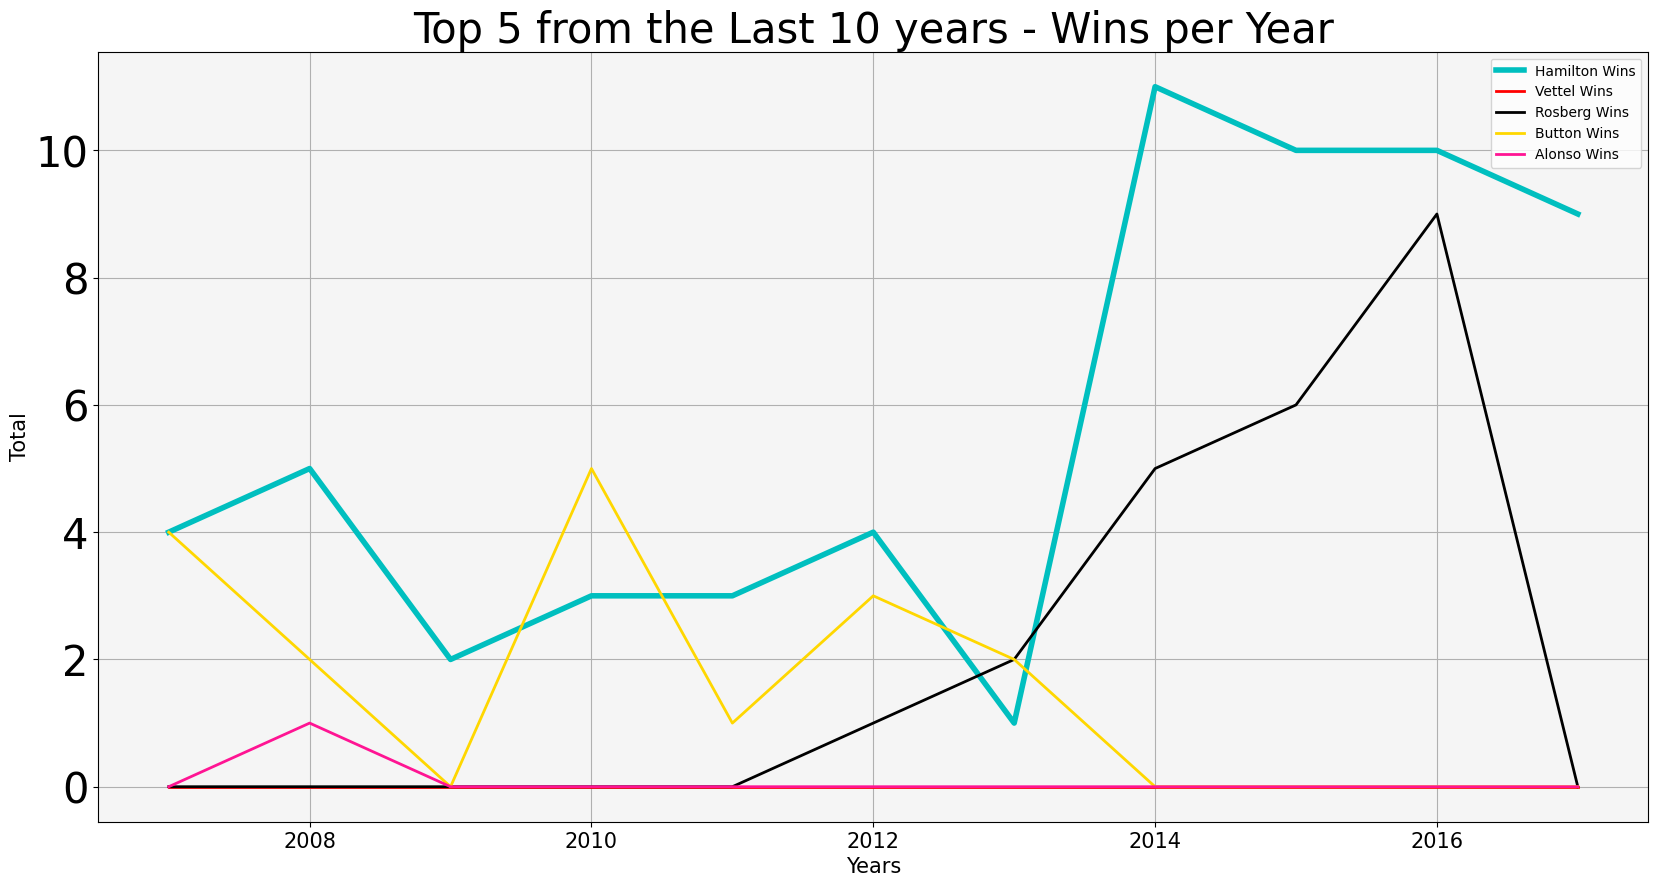

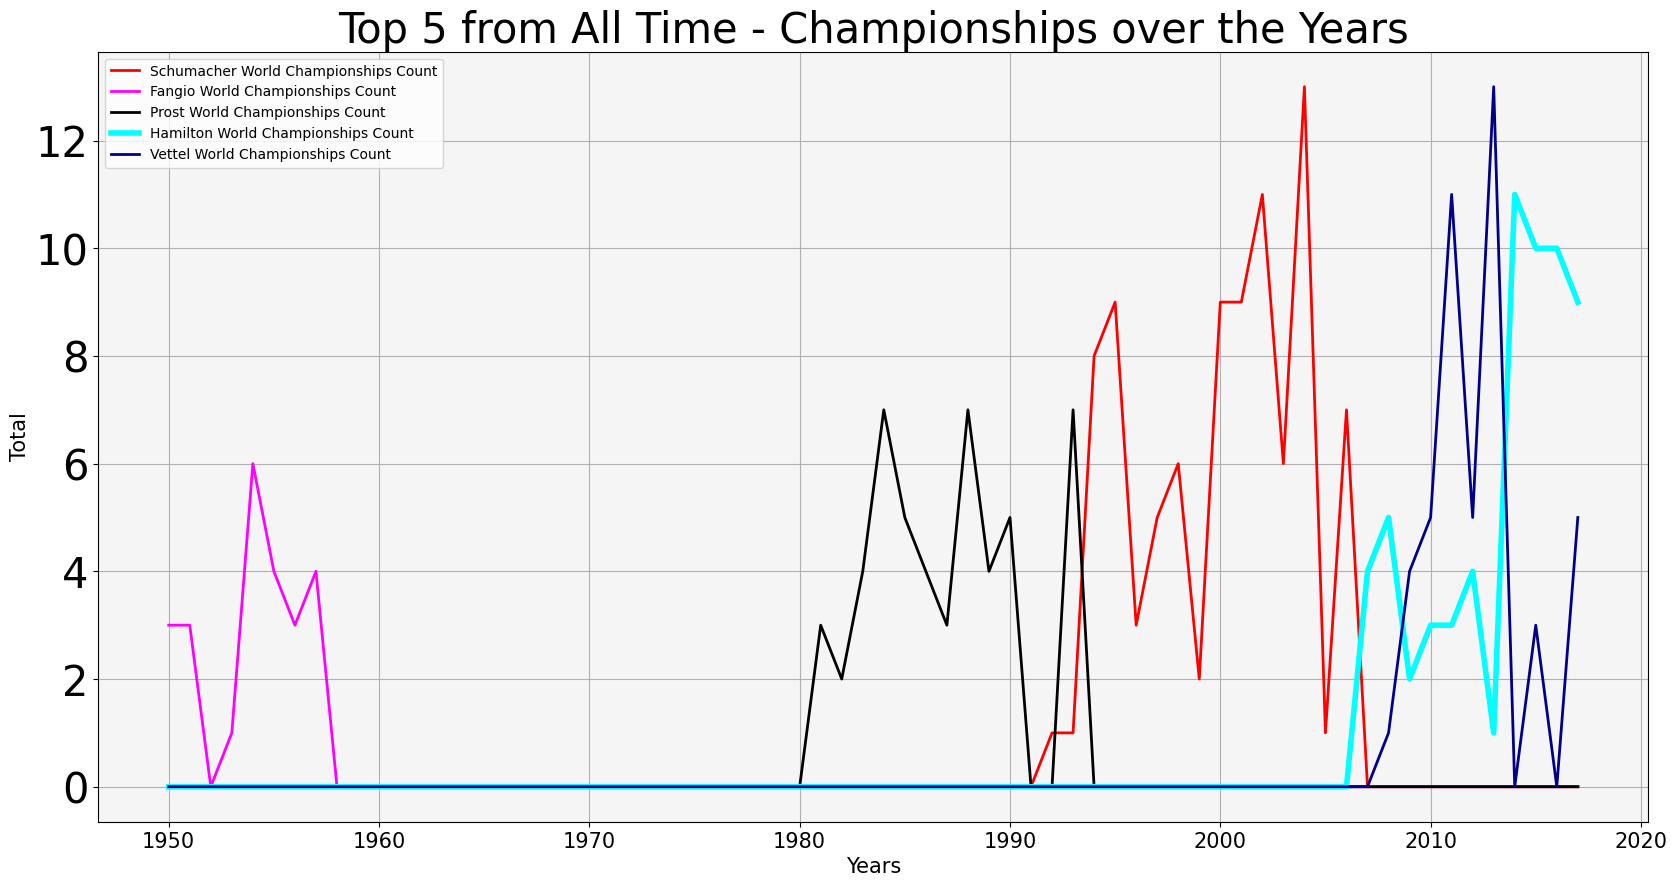

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate wins per year for a given driver
def wins_per_year(driver_id, year):
    return topTenYears[(topTenYears['driverId'] == driver_id) & (topTenYears['year'] == year)]['positionOrder'].eq(1).sum()

# Merge results with races to get the year information
topTenYears = pd.merge(results_df, races_df, on='raceId', how='inner')

# Initialize lists to store wins per year for each driver
hamWinsPerYear = []
vetWinsPerYear = []
rosWinsPerYear = []
butWinsPerYear = []
aloWinsPerYear = []

# Calculate wins per year for each driver from 2007 to 2017
for year in range(2007, 2018):
    hamWinsPerYear.append(wins_per_year(1, year))  # Assuming driverId 1 corresponds to Hamilton
    vetWinsPerYear.append(wins_per_year(2, year))  # Assuming driverId 2 corresponds to Vettel
    rosWinsPerYear.append(wins_per_year(3, year))  # Assuming driverId 3 corresponds to Rosberg
    butWinsPerYear.append(wins_per_year(4, year))  # Assuming driverId 4 corresponds to Button
    aloWinsPerYear.append(wins_per_year(5, year))  # Assuming driverId 5 corresponds to Alonso

# Plotting wins per year for top 5 drivers from the last 10 years
x = range(2007, 2018)
f, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)
ax.set_facecolor('whitesmoke')

line1, = ax.plot(x, hamWinsPerYear, label='Hamilton Wins', color='c', linewidth=4)
line2, = ax.plot(x, vetWinsPerYear, label='Vettel Wins', linewidth=2, color='r')
line3, = ax.plot(x, rosWinsPerYear, label='Rosberg Wins', color='k', linewidth=2)
line4, = ax.plot(x, butWinsPerYear, label='Button Wins', linewidth=2, color='gold')
line5, = ax.plot(x, aloWinsPerYear, label='Alonso Wins', color='deeppink', linewidth=2)

plt.title("Top 5 from the Last 10 years - Wins per Year", fontsize=30)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.grid()
ax.legend()
plt.show()

# Define a function to count the number of championships won by a driver in each year
def championshipsInYears(years, driver_ref):
    driver_id = drivers_df[drivers_df['driverRef'] == driver_ref]['driverId'].values[0]
    championships = []
    for year in years:
        # Assuming the 'results' DataFrame has a column 'positionOrder' indicating the finishing position
        champion = results_df[(results_df['raceId'].isin(races_df[races_df['year'] == year]['raceId'])) &
                           (results_df['driverId'] == driver_id) &
                           (results_df['positionOrder'] == 1)]
        championships.append(len(champion))
    return championships

# Plotting world championships count over the years for top 5 drivers
years = np.sort(races_df['year'].unique())
schummyCP = championshipsInYears(years, 'michael_schumacher')
fangioCP = championshipsInYears(years, 'fangio')
prostCP = championshipsInYears(years, 'prost')
hamiltonCP = championshipsInYears(years, 'hamilton')
vettelCP = championshipsInYears(years, 'vettel')

x = range(1950, 2018)
f, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)
ax.set_facecolor('whitesmoke')

line1, = ax.plot(x, schummyCP[:len(x)], label='Schumacher World Championships Count', color='r', linewidth=2)
line2, = ax.plot(x, fangioCP[:len(x)], label='Fangio World Championships Count', linewidth=2, color='magenta')
line3, = ax.plot(x, prostCP[:len(x)], label='Prost World Championships Count', color='k', linewidth=2)
line4, = ax.plot(x, hamiltonCP[:len(x)], label='Hamilton World Championships Count', linewidth=4, color='aqua')
line5, = ax.plot(x, vettelCP[:len(x)], label='Vettel World Championships Count', color='darkblue', linewidth=2)

plt.title("Top 5 from All Time - Championships over the Years", fontsize=30)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.grid()
ax.legend()
plt.show()
